# Lead Score - Case Study

### Problem Statement

X Education, an online course provider for industry professionals, faces a challenge with poor lead conversion rates despite attracting numerous leads daily. They seek to enhance efficiency by identifying 'Hot Leads', those most likely to convert into paying customers, thereby improving their lead conversion rate. They aim for a target lead conversion rate of 80%. 

Goal: 

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import statsmodels.api as sm

### Importing the data

In [4]:
df = pd.read_csv('Leads.csv')

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Understanding the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning

#### Handling missing values

In [8]:
# Find percentage of null values in each column
def calculate_missing_values():
    return round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

calculate_missing_values()

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [9]:
# Drop columns having more than 33% null values
df = df.drop(['Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index', 'Tags'], axis=1)

In [10]:
# Drop null value rows in 'Page Views Per Visit', 'TotalVisits'
df = df.dropna(subset=['Page Views Per Visit', 'TotalVisits'])

In [11]:
# Identify Categorical and Numerical Columns
numerical_columns_to_analyze = []
categorical_columns_to_analyze = []

def divide_columns_into_numerical_and_categorical_columns():
    global numerical_columns_to_analyze, categorical_columns_to_analyze
    id_columns = ['Prospect ID', 'Lead Number']
    region_columns = ['Country', 'City']
    numerical_columns_to_analyze = ['Page Views Per Visit', 'TotalVisits']
    # Identidy remaining columns as categorical
    categorical_columns_to_analyze = list(set(df.columns) - set(numerical_columns_to_analyze) - set(id_columns) - set(region_columns) - set(['Converted']))
    print("Numerical Columns:", numerical_columns_to_analyze)
    print("Categorical Columns:", categorical_columns_to_analyze)

divide_columns_into_numerical_and_categorical_columns()

Numerical Columns: ['Page Views Per Visit', 'TotalVisits']
Categorical Columns: ['Last Activity', 'Newspaper Article', 'Receive More Updates About Our Courses', 'How did you hear about X Education', 'Lead Profile', 'I agree to pay the amount through cheque', 'Specialization', 'Newspaper', 'Magazine', 'Lead Source', 'Search', 'X Education Forums', 'Total Time Spent on Website', 'Do Not Call', 'Do Not Email', 'Digital Advertisement', 'Lead Origin', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'What matters most to you in choosing a course', 'Through Recommendations', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


##### Handling other columns with more missing values

In [12]:
# Handle missing values for Lead Profile
print(df['Lead Profile'].unique())
# Replace null values with 'Select'
df['Lead Profile'] = df['Lead Profile'].replace(np.nan, 'Select')
df['Lead Profile'].unique()

['Select' 'Potential Lead' nan 'Other Leads' 'Dual Specialization Student'
 'Student of SomeSchool' 'Lateral Student']


array(['Select', 'Potential Lead', 'Other Leads',
       'Dual Specialization Student', 'Student of SomeSchool',
       'Lateral Student'], dtype=object)

In [13]:
# Handle missing values for What matters most to you in choosing a course
print(df['What matters most to you in choosing a course'].unique())
# Replace null values with 'No Answer'
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'No Answer')
df['What matters most to you in choosing a course'].unique()

['Better Career Prospects' nan 'Flexibility & Convenience' 'Other']


array(['Better Career Prospects', 'No Answer',
       'Flexibility & Convenience', 'Other'], dtype=object)

In [14]:
# Handle missing values for What is your current occupation
print(df['What is your current occupation'].unique())
# Replace null values with 'No Answer'
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'No Answer')
df['What is your current occupation'].unique()

['Unemployed' 'Student' nan 'Working Professional' 'Businessman' 'Other'
 'Housewife']


array(['Unemployed', 'Student', 'No Answer', 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [15]:
# Handle Missing values for How did you hear about X Education
print(df['How did you hear about X Education'].unique())
# Replace null values with 'Select'
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace(np.nan, 'Select')
df['How did you hear about X Education'].unique()

['Select' 'Word Of Mouth' 'Other' nan 'Online Search' 'Multiple Sources'
 'Advertisements' 'Student of SomeSchool' 'Email' 'Social Media' 'SMS']


array(['Select', 'Word Of Mouth', 'Other', 'Online Search',
       'Multiple Sources', 'Advertisements', 'Student of SomeSchool',
       'Email', 'Social Media', 'SMS'], dtype=object)

In [16]:
# Handle missing values for Country
print(df['Country'].unique())
# Replace null values with 'No Answer'
df['Country'] = df['Country'].replace(np.nan, 'No Answer')
df['Country'].unique()

[nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' 'Saudi Arabia' 'Belgium' 'France' 'Sri Lanka' 'China'
 'Canada' 'Netherlands' 'Sweden' 'Nigeria' 'Hong Kong' 'Germany'
 'Asia/Pacific Region' 'Uganda' 'Kenya' 'Italy' 'South Africa' 'Tanzania'
 'unknown' 'Malaysia' 'Liberia' 'Switzerland' 'Denmark' 'Philippines'
 'Bangladesh' 'Vietnam' 'Indonesia']


array(['No Answer', 'India', 'Russia', 'Kuwait', 'Oman',
       'United Arab Emirates', 'United States', 'Australia',
       'United Kingdom', 'Bahrain', 'Ghana', 'Singapore', 'Qatar',
       'Saudi Arabia', 'Belgium', 'France', 'Sri Lanka', 'China',
       'Canada', 'Netherlands', 'Sweden', 'Nigeria', 'Hong Kong',
       'Germany', 'Asia/Pacific Region', 'Uganda', 'Kenya', 'Italy',
       'South Africa', 'Tanzania', 'unknown', 'Malaysia', 'Liberia',
       'Switzerland', 'Denmark', 'Philippines', 'Bangladesh', 'Vietnam',
       'Indonesia'], dtype=object)

In [17]:
calculate_missing_values()

Specialization                                   15.72
City                                             15.59
Lead Source                                       0.32
Prospect ID                                       0.00
Magazine                                          0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Lead Profile                                      0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Lead Numbe

In [18]:
# Convert 'google' to 'Google'
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [19]:
# Convert non 'India' to 'Others'
df.loc[df['Country'] != 'India', 'Country'] = 'Others'

#### Remove Columns that don't add any value

Columns such as 'I agree to pay the amount through cheque', 'Do Not call', 'Do Not Email', 'Newspaper', 'Newspaper Article', 'Get updates on DM Content', 'Receive More Updates About Our Courses', 'Digital Advertisement', 'A Free copy of Mastering The Interview', 'Update me on Supply Chain Content', 'Through Recommendations', 'Magazine', 'X Education Forums', 'Search' and 'How did you hear about X Education' have single value across all rows. These columns are of no use to perform analysis. So we will remove them.

In [20]:
df.drop(['I agree to pay the amount through cheque', 'Do Not Call', 'Do Not Email', 'Newspaper', 'Newspaper Article', 'Get updates on DM Content', 'Receive More Updates About Our Courses', 'Digital Advertisement', 'A free copy of Mastering The Interview', 'Update me on Supply Chain Content', 'Through Recommendations', 'Magazine', 'X Education Forums', 'Search', 'How did you hear about X Education'], axis = 1, inplace = True)

In [21]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [22]:
#Drop 'Prospect ID' too.
df.drop(['Prospect ID'], axis = 1, inplace = True)

In [23]:
divide_columns_into_numerical_and_categorical_columns()

Numerical Columns: ['Page Views Per Visit', 'TotalVisits']
Categorical Columns: ['Last Activity', 'Lead Origin', 'What matters most to you in choosing a course', 'Lead Profile', 'What is your current occupation', 'Last Notable Activity', 'Lead Source', 'Specialization', 'Total Time Spent on Website']


#### Handling outliers

In [154]:
def boxplot_distribution(df, columns, column_names, rows = 20, cols = 2):
   plt.figure(figsize=(20,40))
   c = 1
   for column, column_name in zip(columns, column_names):
       plt.subplot(rows, cols, c)
       sns.boxplot(df[column], orient='h')
       plt.xticks([])
       c = c + 1 

   plt.tight_layout()
   plt.show()

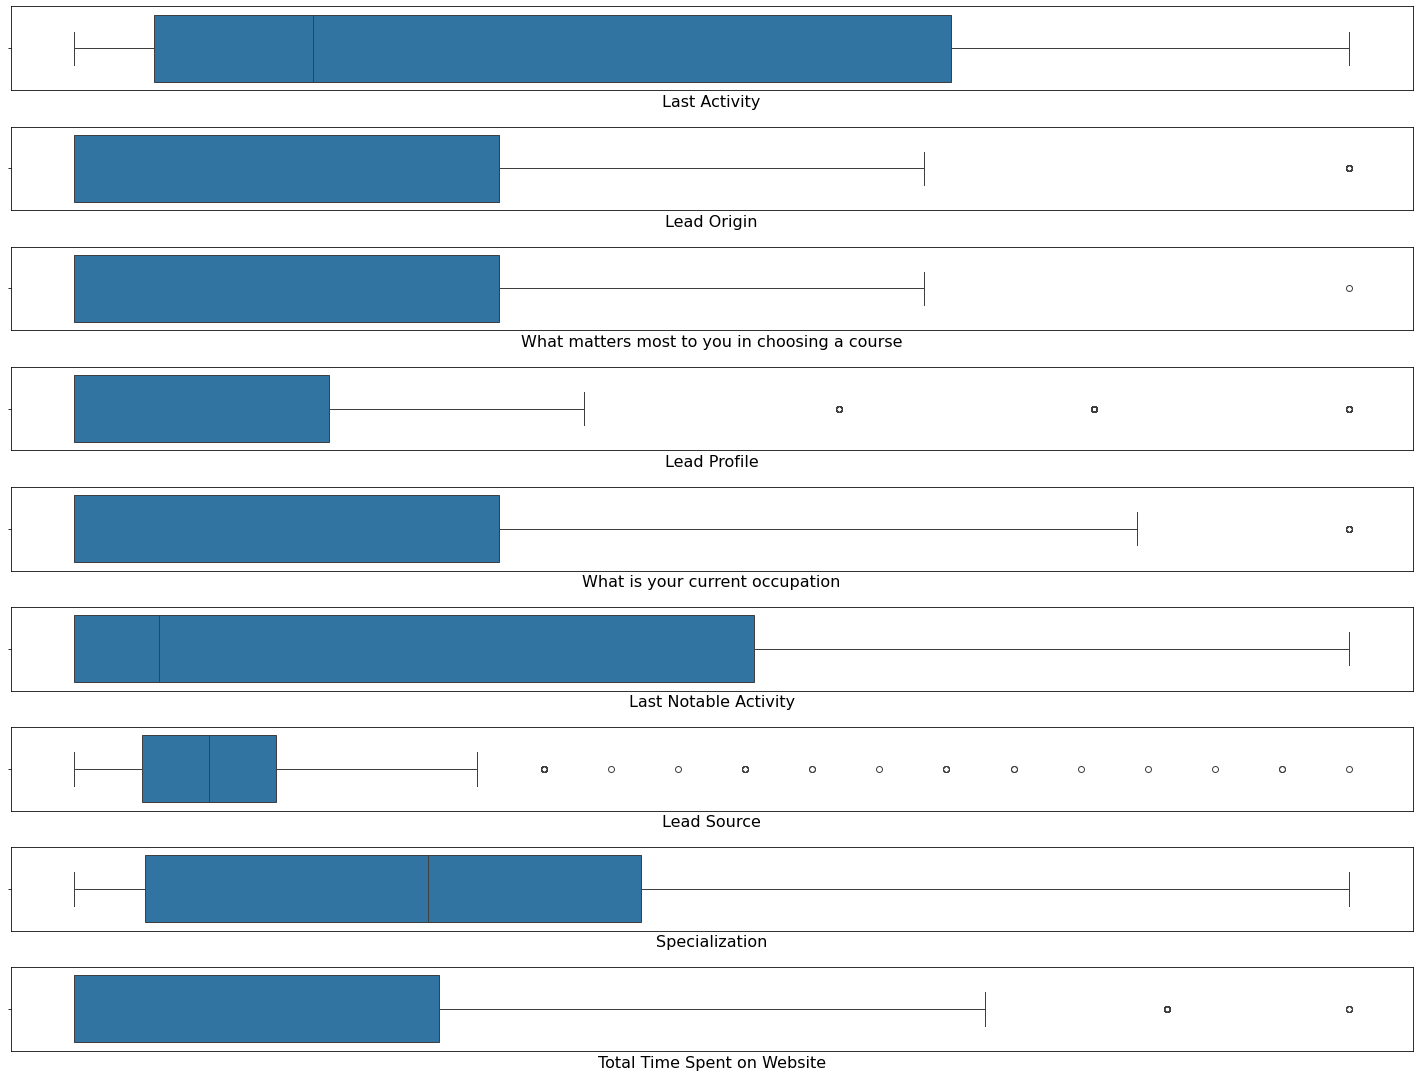

In [155]:
boxplot_distribution(df, df[categorical_columns_to_analyze], categorical_columns_to_analyze, rows=24, cols=1)

*Observations:*

There are no major outliers for the categorical columns.

#### Convert Total Time Spent on Website to categorical


In [26]:
def convert_time_spent_to_minutes(time_spent):
    if pd.isnull(time_spent):
        return np.nan
    else:
        return int(time_spent / 60)

df['Total Time Spent on Website'] = df['Total Time Spent on Website'].apply(lambda x: convert_time_spent_to_minutes(x))
df['Total Time Spent on Website']

0        0
1       11
2       25
3        5
4       23
        ..
9235    30
9236     3
9237     3
9238     8
9239    21
Name: Total Time Spent on Website, Length: 9103, dtype: int64

In [27]:
def convert_time_spent_to_category(time_spent):
    if pd.isnull(time_spent):
        return np.nan
    elif time_spent <= 5:
        return '0-5'
    elif time_spent <= 10:
        return '6-10'
    elif time_spent <= 15:
        return '11-15'
    elif time_spent <= 20:
        return '16-20'
    elif time_spent <= 25:
        return '21-25'
    elif time_spent <= 30:
        return '26-30'
    elif time_spent <= 35:
        return '31-35'
    elif time_spent <= 40:
        return '36-40'
    elif time_spent <= 45:
        return '41-45'

df['Total Time Spent on Website'] = df['Total Time Spent on Website'].apply(lambda x: convert_time_spent_to_category(x))
df['Total Time Spent on Website']

0         0-5
1       11-15
2       21-25
3         0-5
4       21-25
        ...  
9235    26-30
9236      0-5
9237      0-5
9238     6-10
9239    21-25
Name: Total Time Spent on Website, Length: 9103, dtype: object

### Exploratory Data Analysis

In [28]:
# Convert dataframe to converted vs not converted
df_conv = df[df['Converted'] == 1]
df_not_conv = df[df['Converted'] == 0]

#### Univariate Analysis

In [29]:
def plot_category(category, orient = 'vertical', height = 10, width = 40):
    plt.rcParams['font.size'] = 16
    plt.figure(figsize=(width, height))
    plt.subplot(1, 2, 1)
    df_conv[category].value_counts(normalize=True).plot.bar(orientation = orient)
    plt.title('Converted')
    plt.subplot(1, 2, 2)
    df_not_conv[category].value_counts(normalize=True).plot.bar(orientation = orient)
    plt.title('Not Converted')
    plt.tight_layout()
    plt.show()


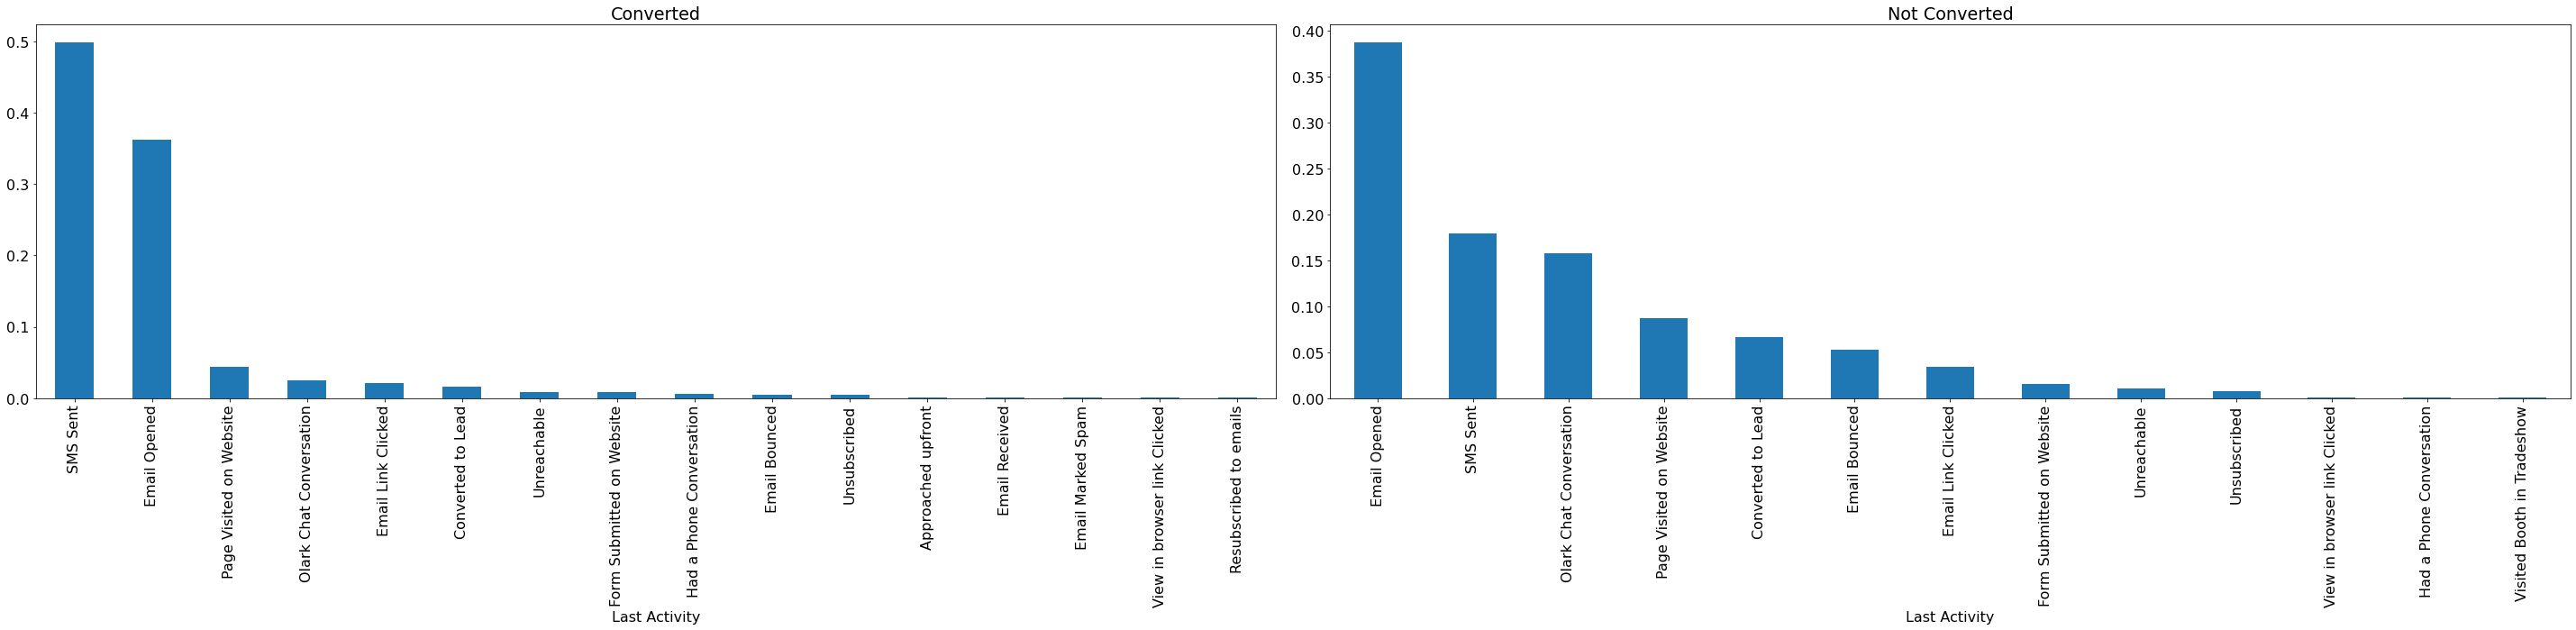

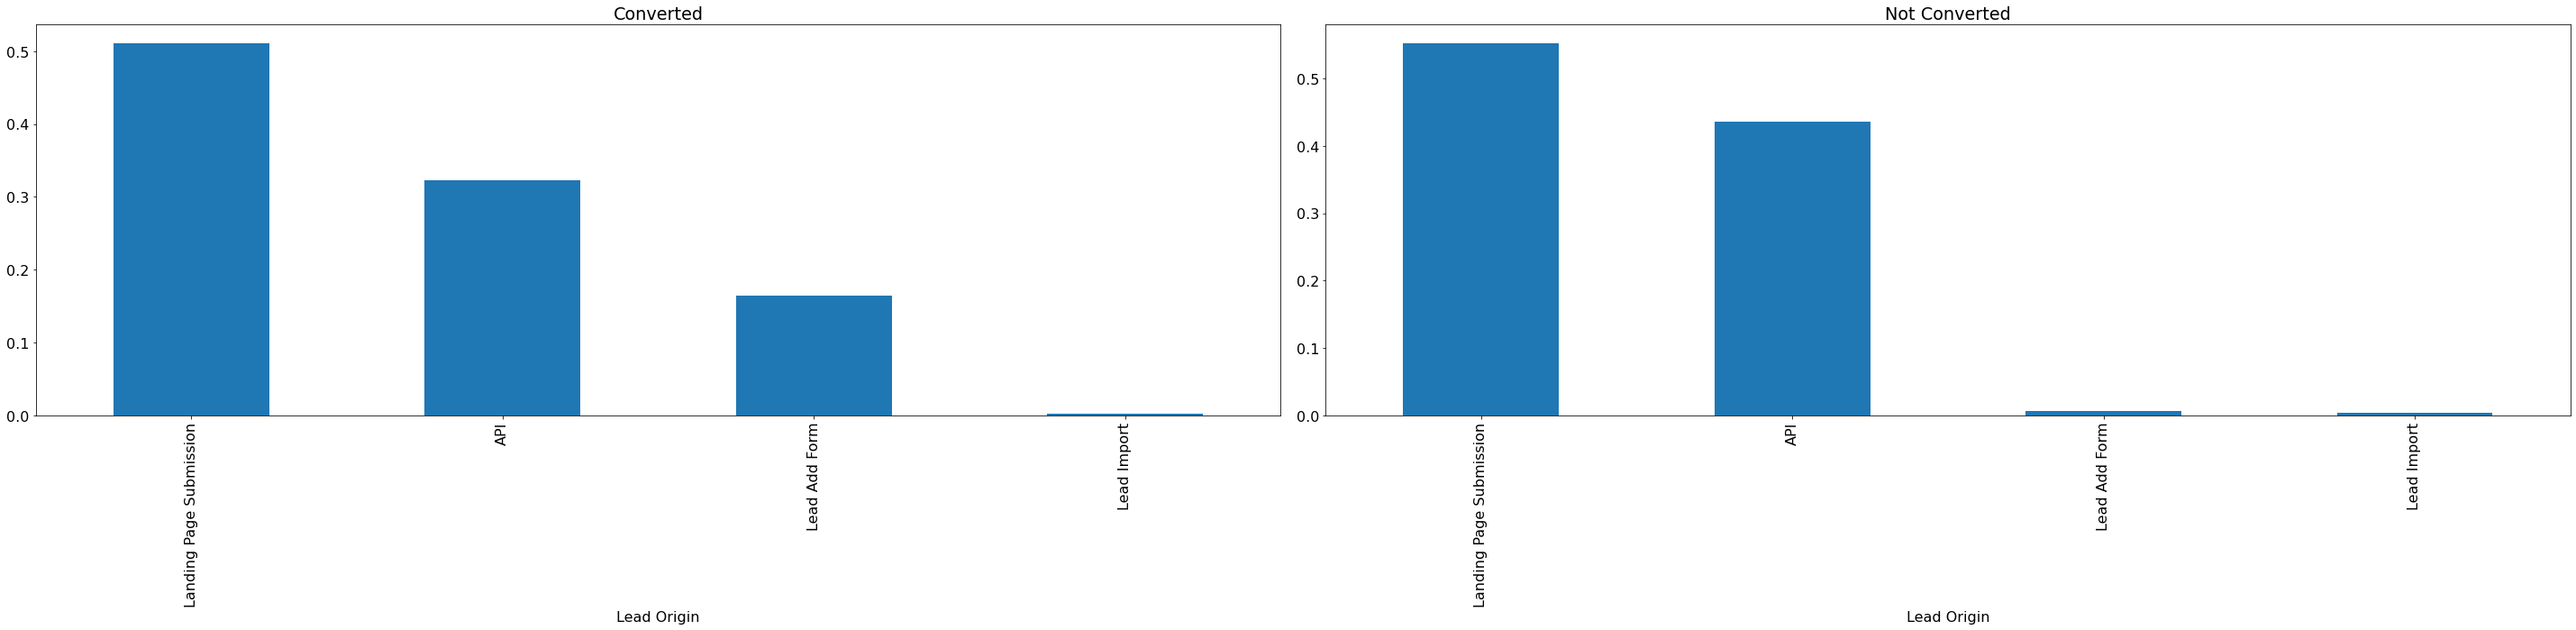

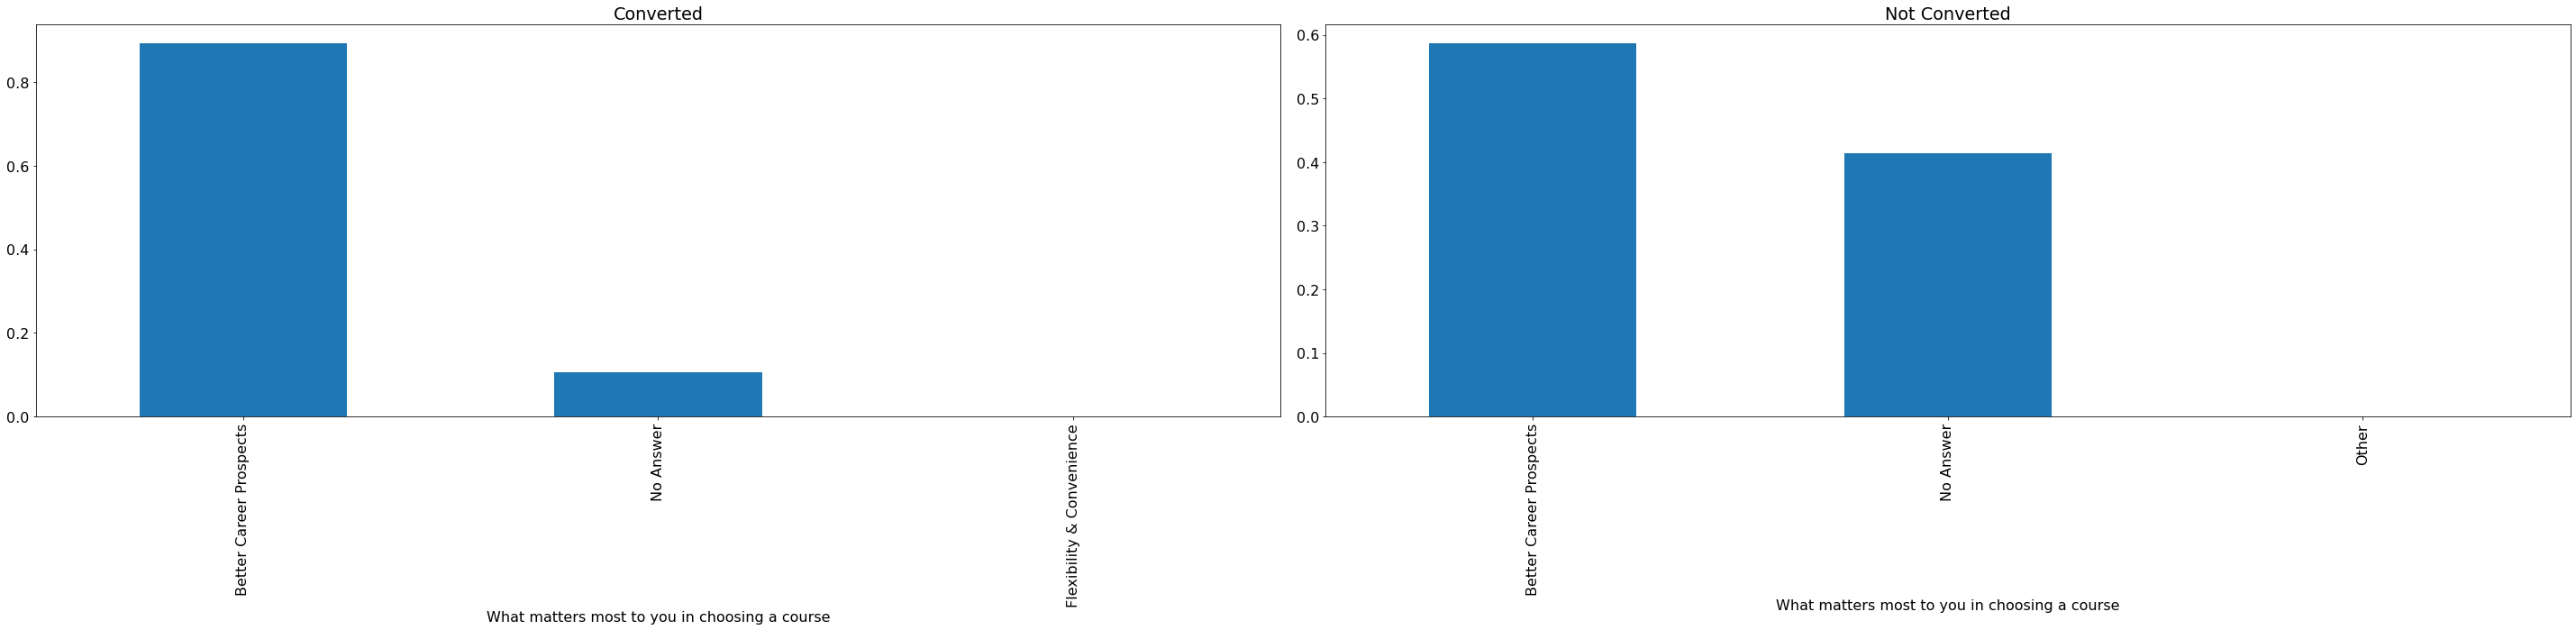

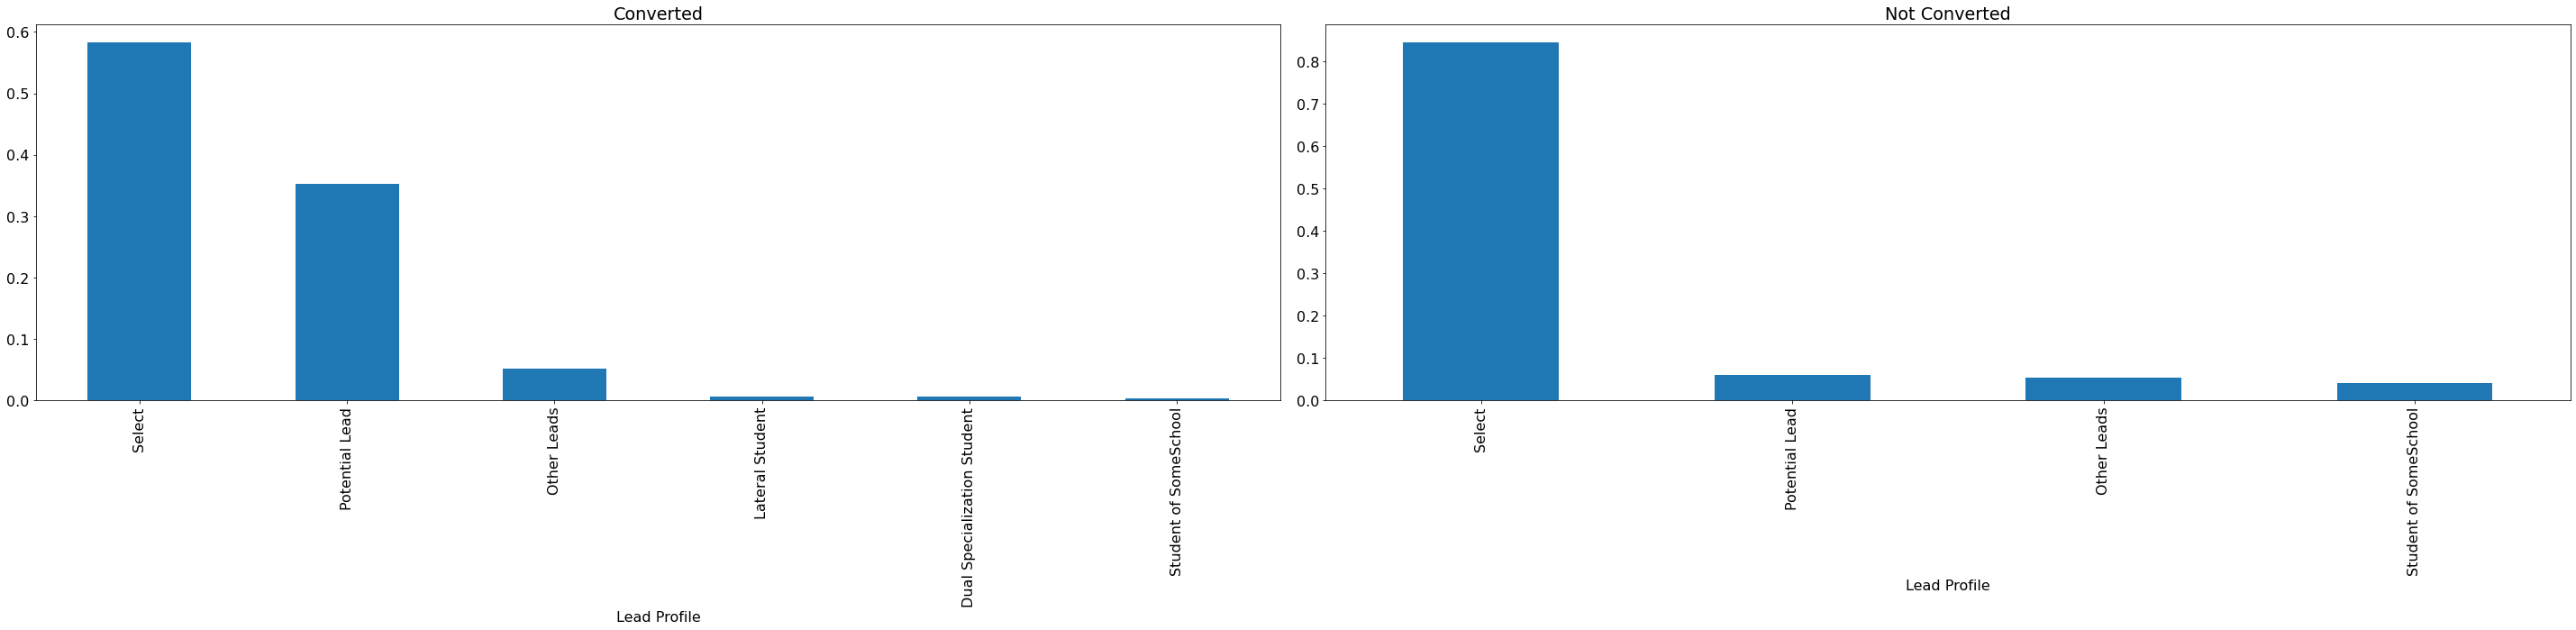

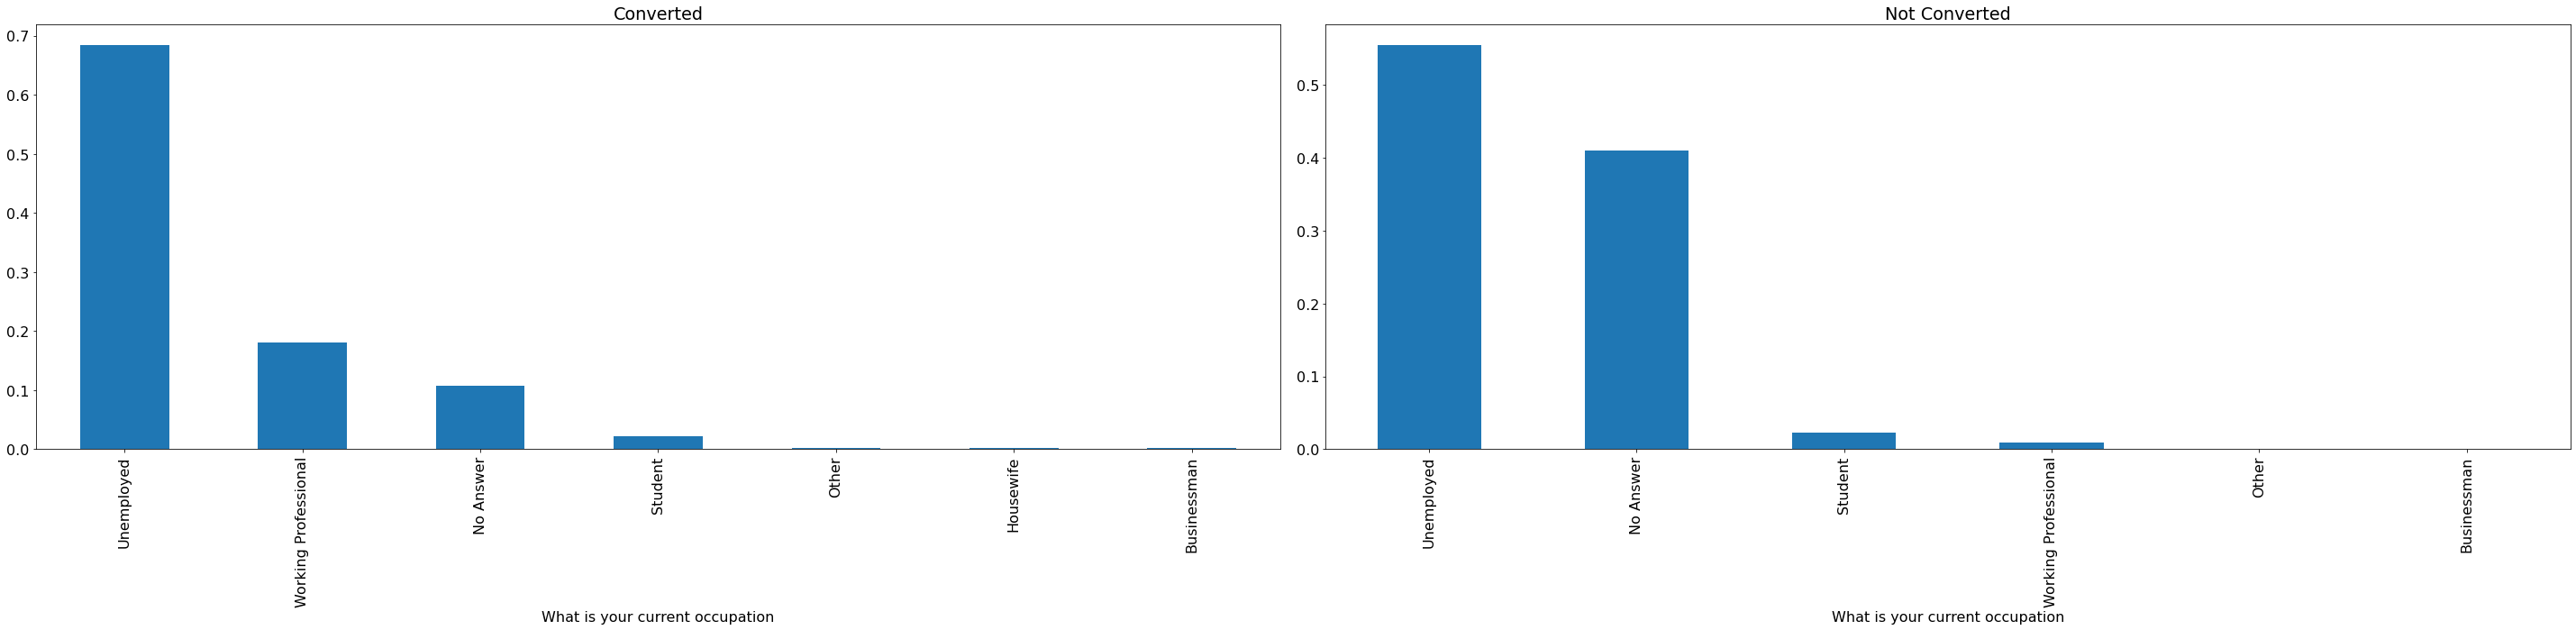

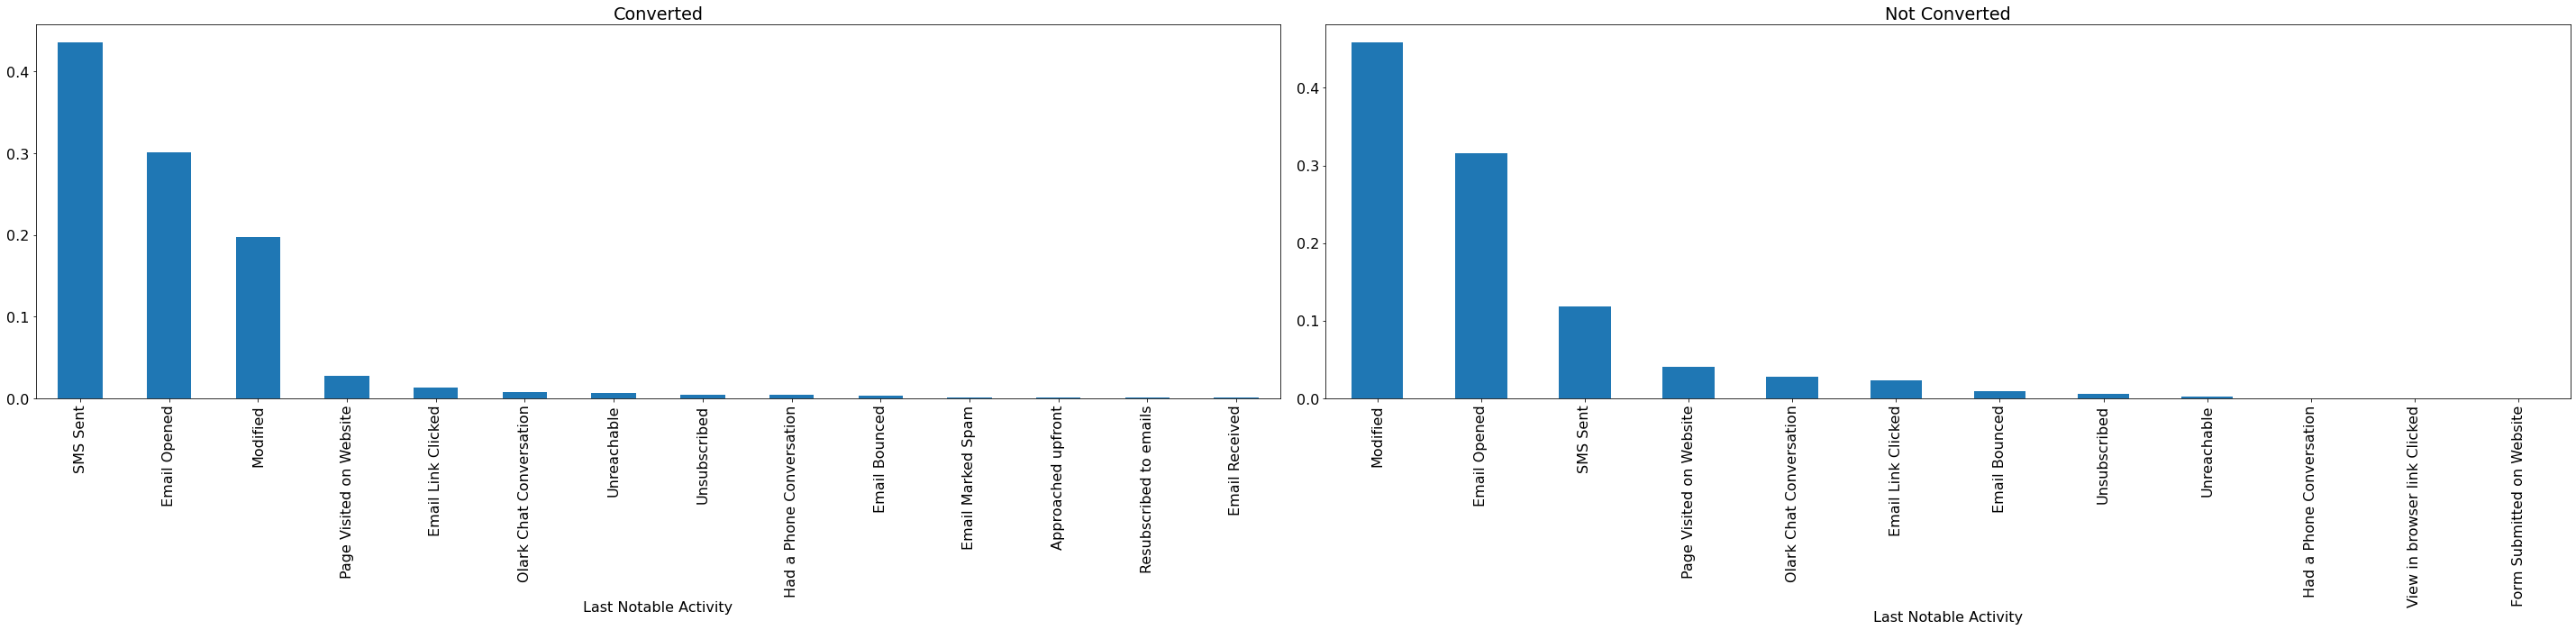

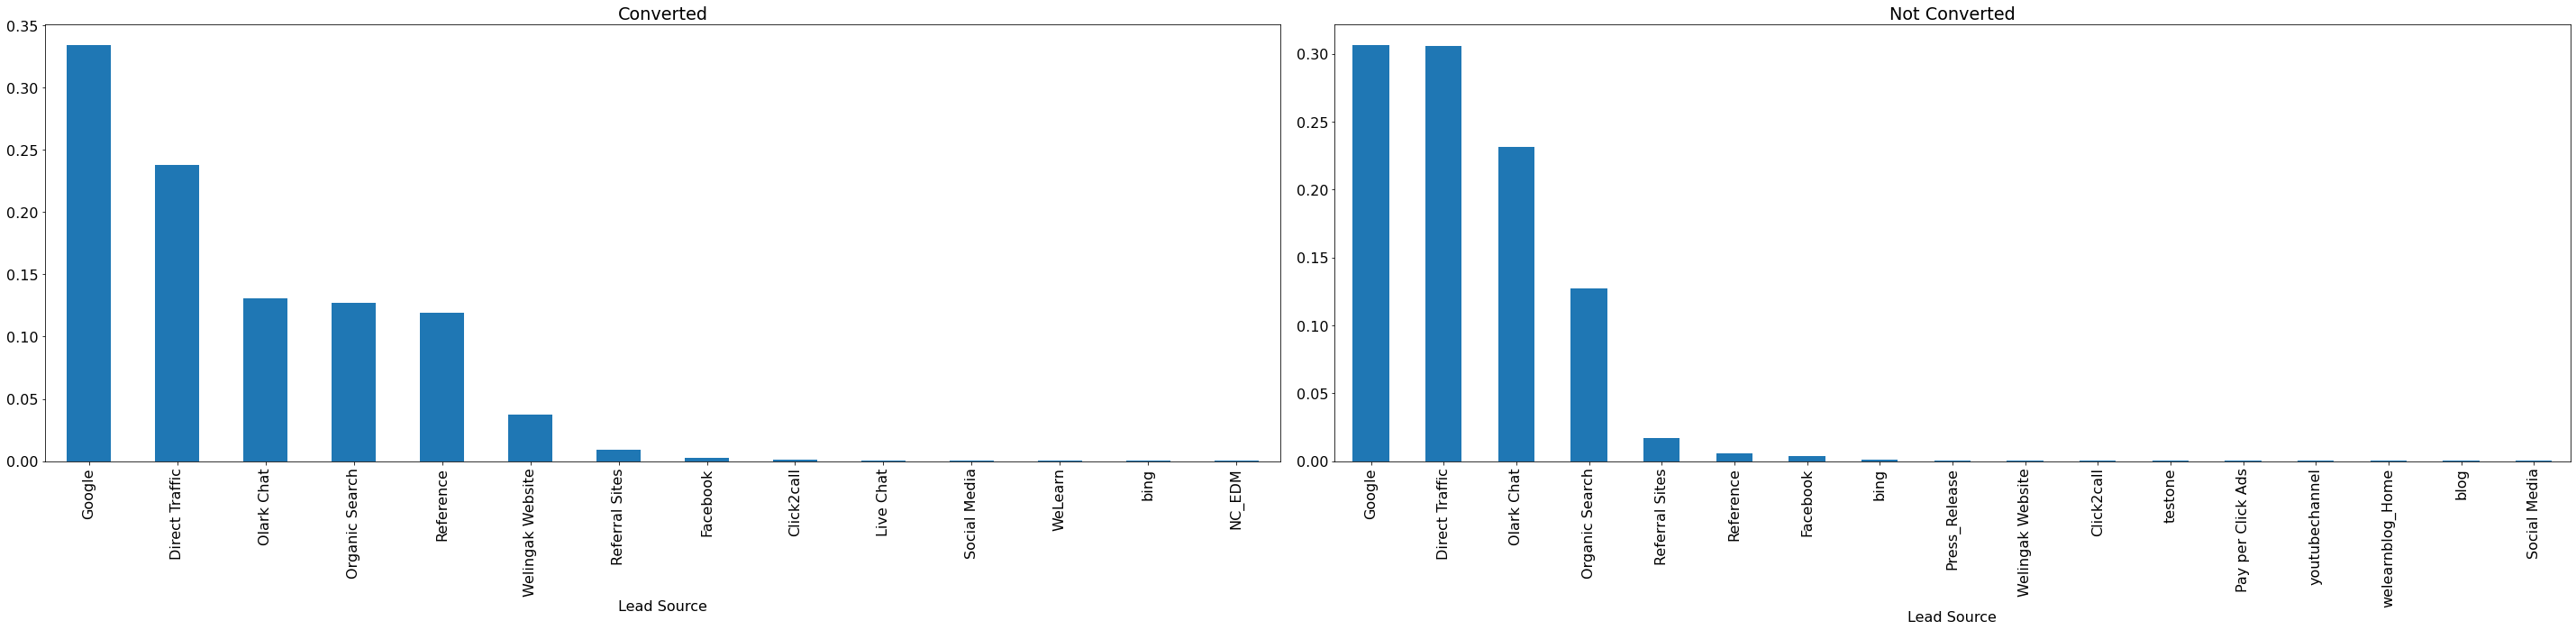

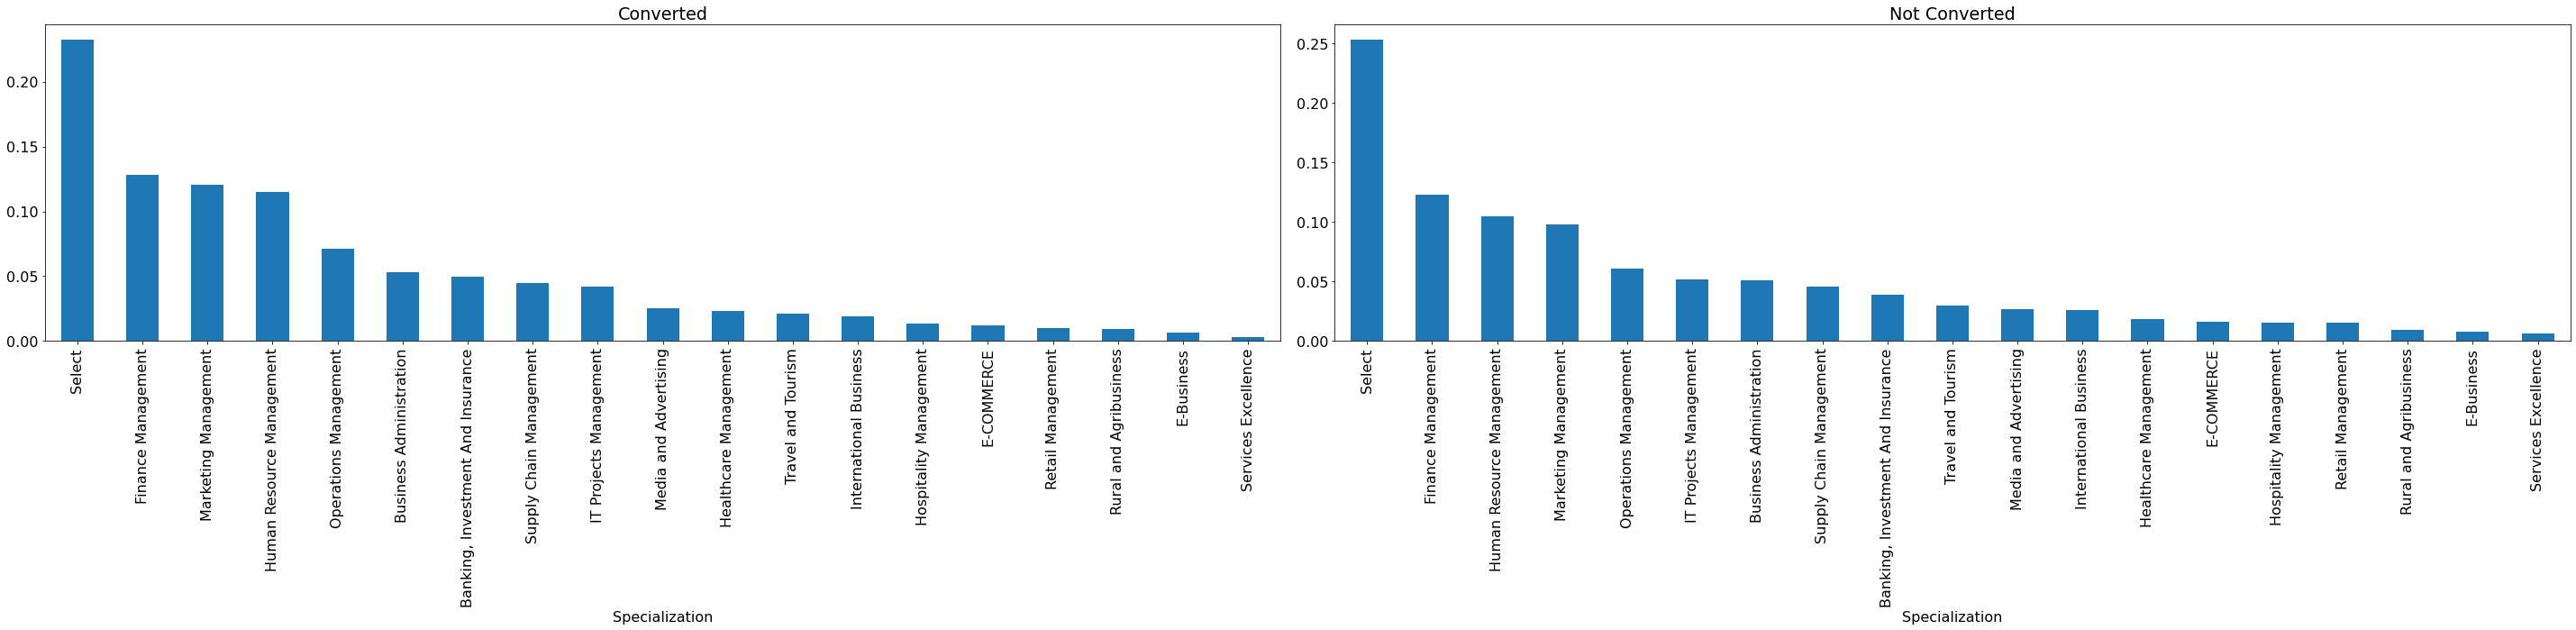

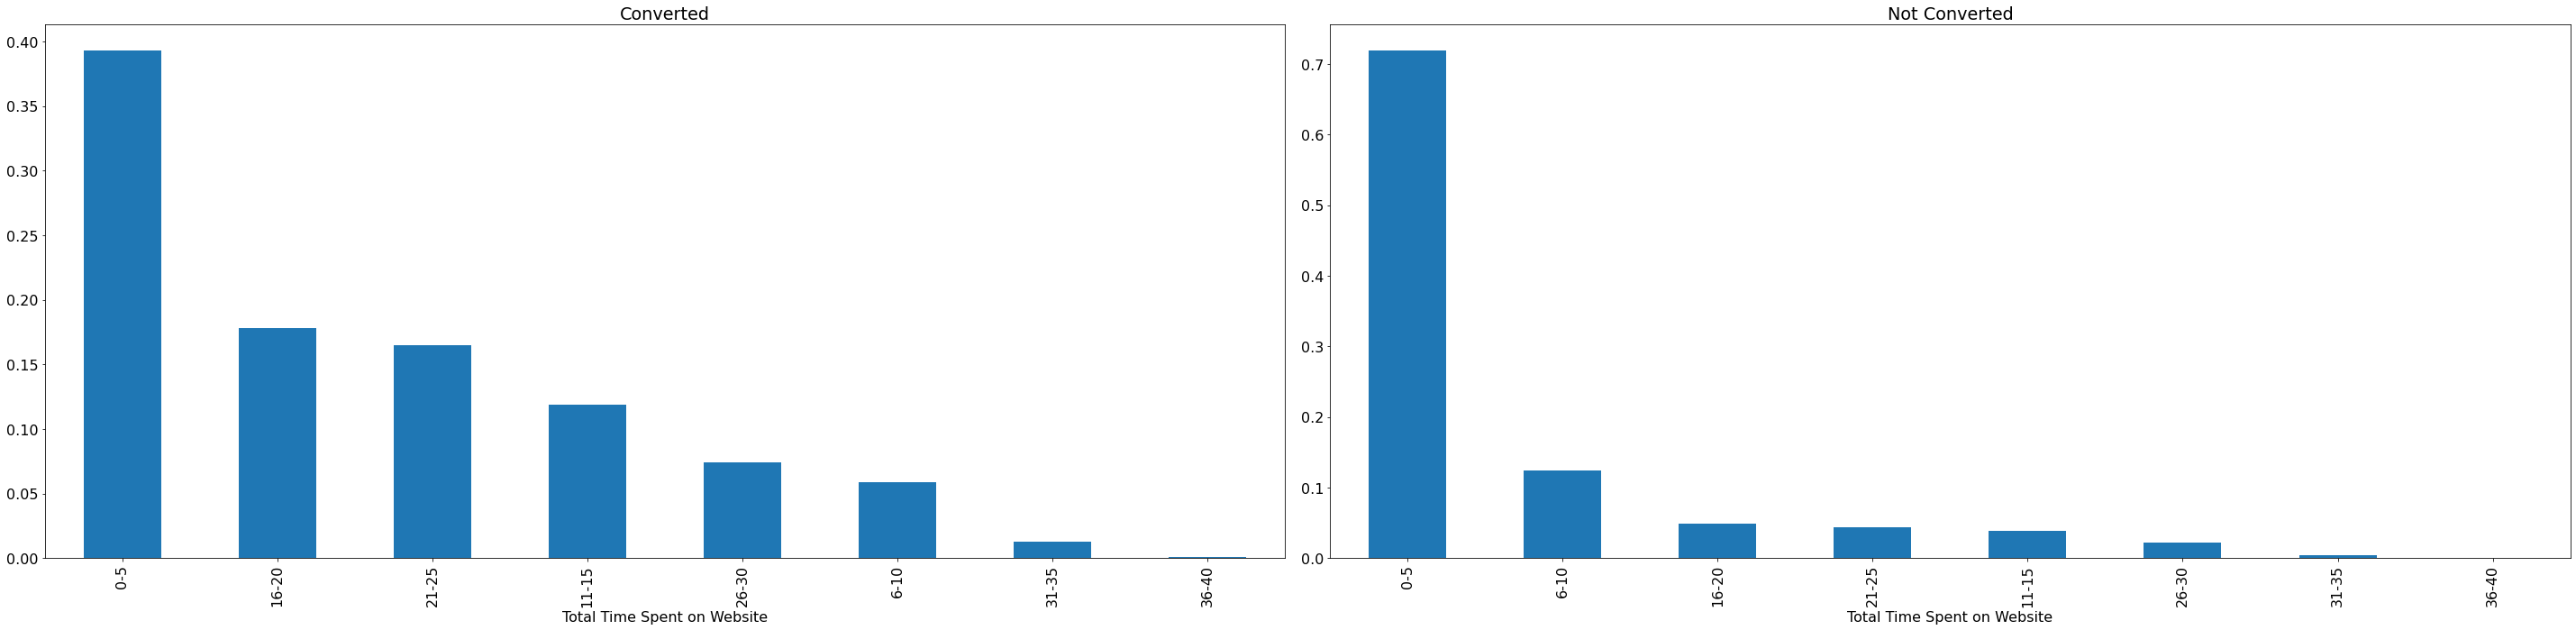

In [30]:
# Visualize Categorical Columns
for col in categorical_columns_to_analyze:
    plot_category(col)

*Observation*
1. If total time spent on website greater than 15 minutes, there are more chances for lead to convert.
2. Working Professionals are more likely to convert.
3. Leads notified by sms are more likely to convert.

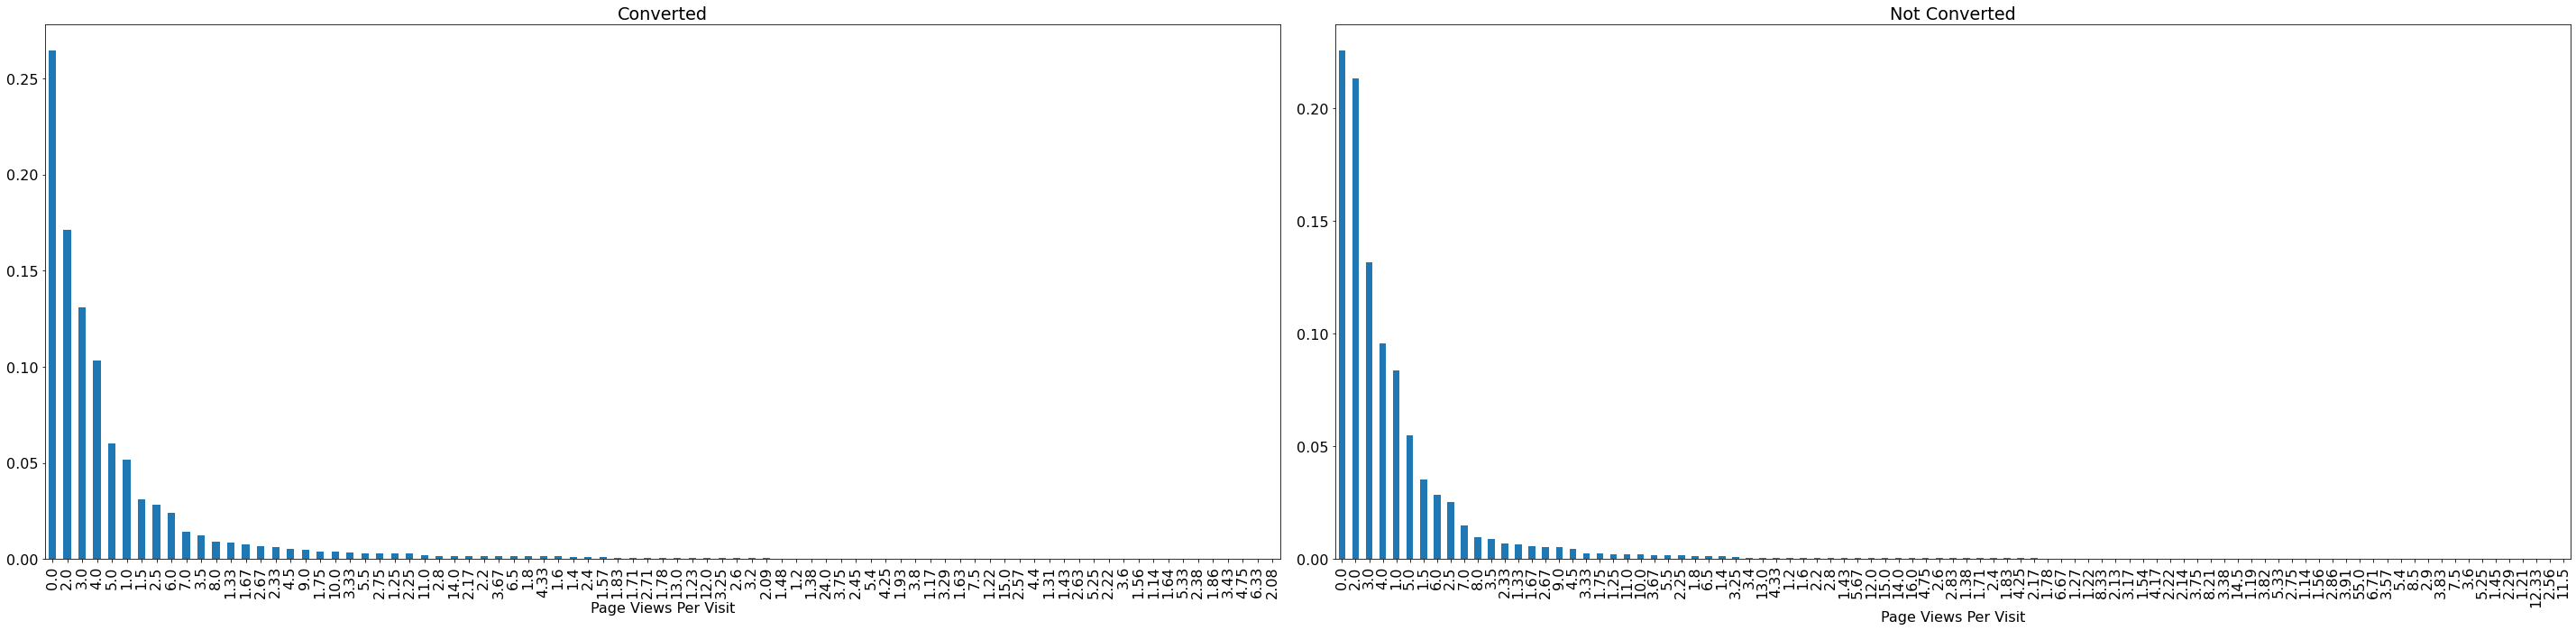

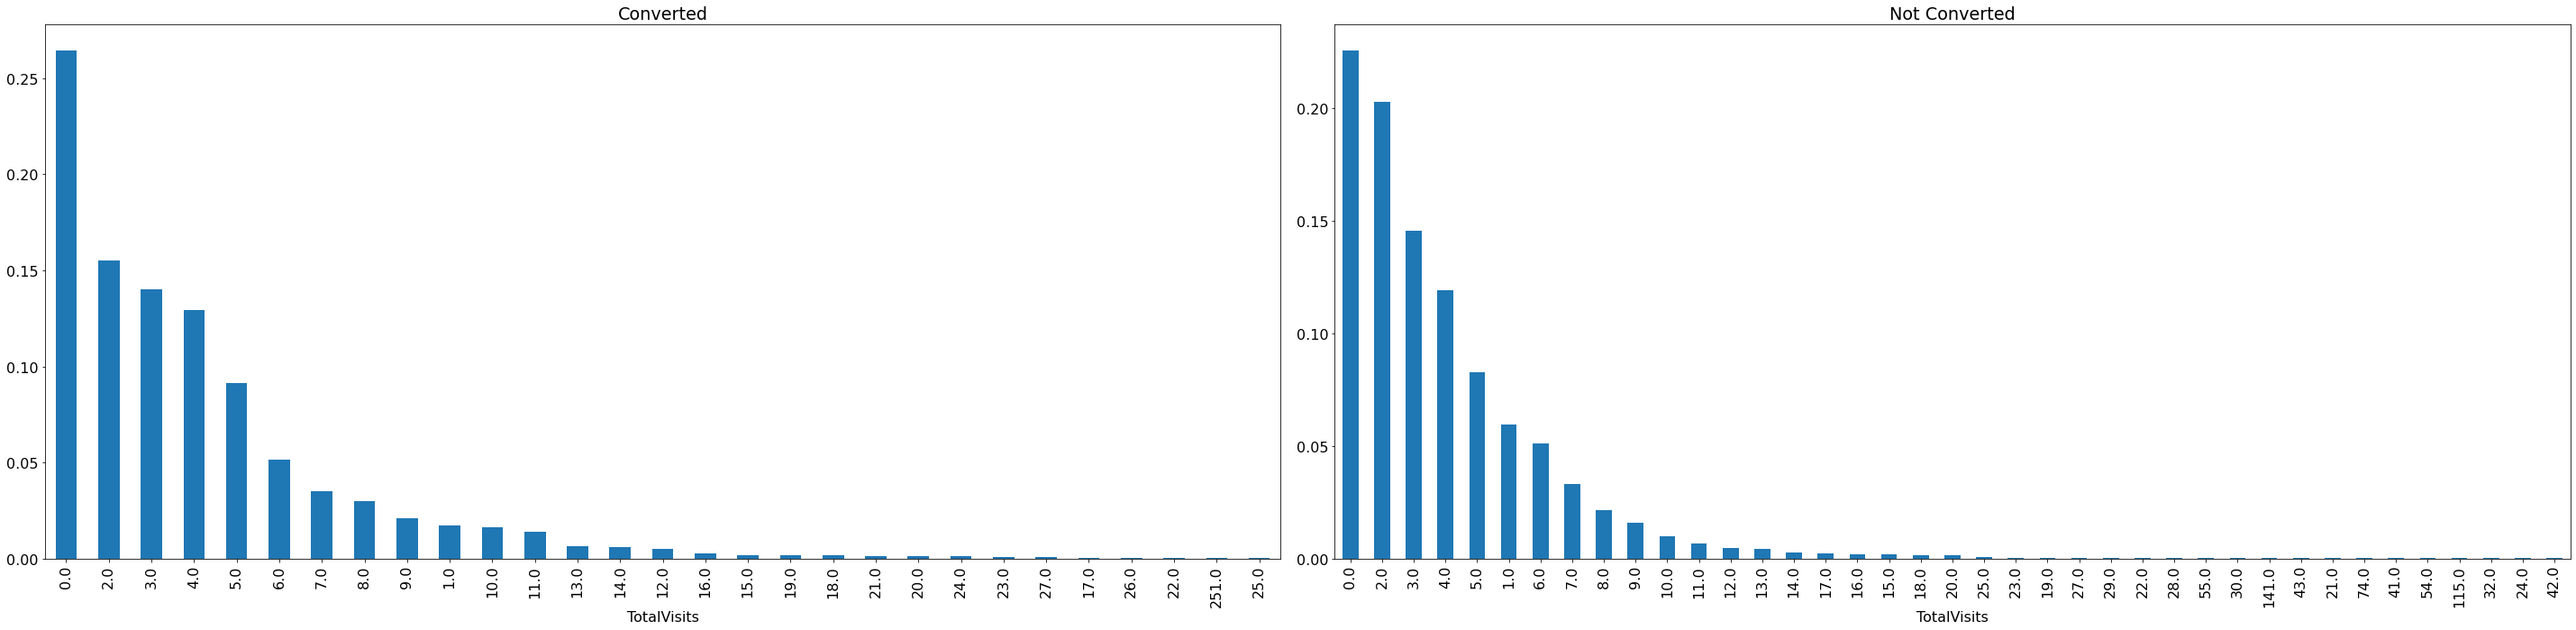

In [31]:
# Visualize Numerical Columns
for col in numerical_columns_to_analyze:
    plot_category(col)

#### Bivariate and Multivariate Analysis

##### What matters most to you in choosing a course vs What is your current occupation

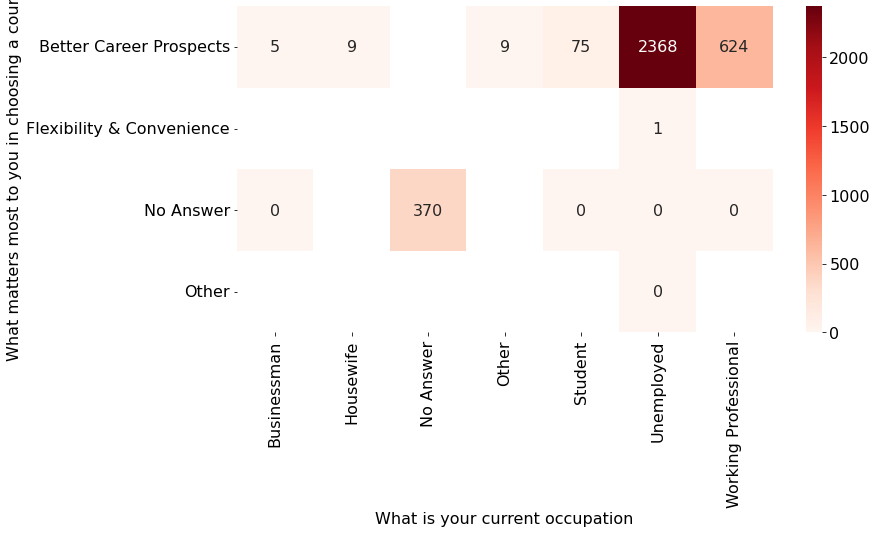

In [32]:
#Finding correlation among  What matters most to you in choosing a course, What is your current occupation
res = pd.pivot_table(data=df, index="What matters most to you in choosing a course", columns="What is your current occupation", values='Converted', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Reds',fmt='.0f')
plt.show()

*Observation:*

Unemployed people with Better Career Prospect are more likely to convert

##### Specialization vs What is your current occupation

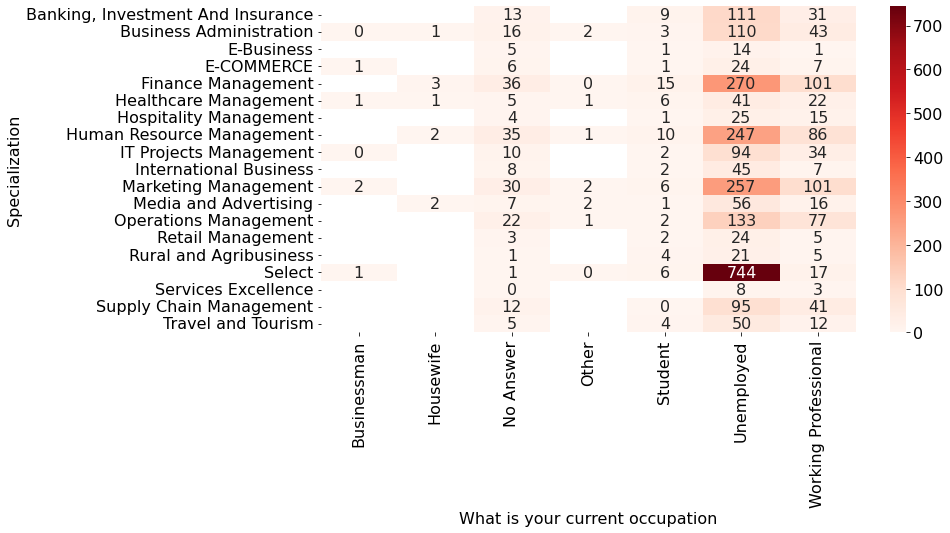

In [33]:
# Finding correlation between specializattion and what is your current occupation
res = pd.pivot_table(data=df, index="Specialization", columns="What is your current occupation", values='Converted', aggfunc="sum")
plt.figure(figsize=(12,6))
sns.heatmap(res, annot=True,cmap='Reds',fmt='.0f')
plt.show()

*Observation:*

Unemployed people who aspire to take up specializations as Finance Management, Human Resources and Marketing Specializations are more likely to convert.

### Create dummy variables.

In [34]:
temp = df.loc[:, df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Total Time Spent on Website',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [35]:
df.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [36]:
dummy = pd.get_dummies(df[temp.columns], drop_first=True, dtype=int)
dummy.columns

Index(['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Total Time Spent on Website_11-15',
       'Total Time Spent on Website_16-20',
       'Total Time Spent on Website_21-25',
       'Total Time Spent on Website_26-30',
       'Total Time Spent on Website_31-35',
       'Total Time Spent on Website_36-40', 'Total Time Spent on Website_6-10',
       'Last Activity_Converted

In [37]:
# Add the results to the master dataframe
df_final_dum = pd.concat([df, dummy], axis=1)
df_final_dum.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0.0,0-5,0.0,Page Visited on Website,Others,Select,...,0,0,1,0,0,0,0,0,0,0
1,660728,API,Organic Search,0,5.0,11-15,2.5,Email Opened,India,Select,...,0,0,0,0,0,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,21-25,2.0,Email Opened,India,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,0-5,1.0,Unreachable,India,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,21-25,1.0,Converted to Lead,India,Select,...,0,0,1,0,0,0,0,0,0,0


In [38]:
#Drop temp columns
df_final_dum.drop(temp.columns, axis=1, inplace=True)

In [39]:
df_final_dum.head()

,Lead Number,Converted,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [40]:
#Dropping Unnecessary columns with select or no anser as values.
df_final_dum = df_final_dum.filter(regex='^(?!.*Select|.*No Answer).*$')
df_final_dum.head()

,Lead Number,Converted,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,660728,0,5.0,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,660719,0,1.0,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,660681,1,2.0,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Test Train Split

In [41]:
X = df_final_dum.drop(['Converted', 'Lead Number'], axis=1)
y = df_final_dum['Converted']

In [42]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scale the data

In [43]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit']])

In [44]:
X_train.head()

,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0.011952,0.027273,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5520,0.027888,0.127273,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0.019920,0.045455,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1566,0.055777,0.063636,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9170,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Looking into correlation

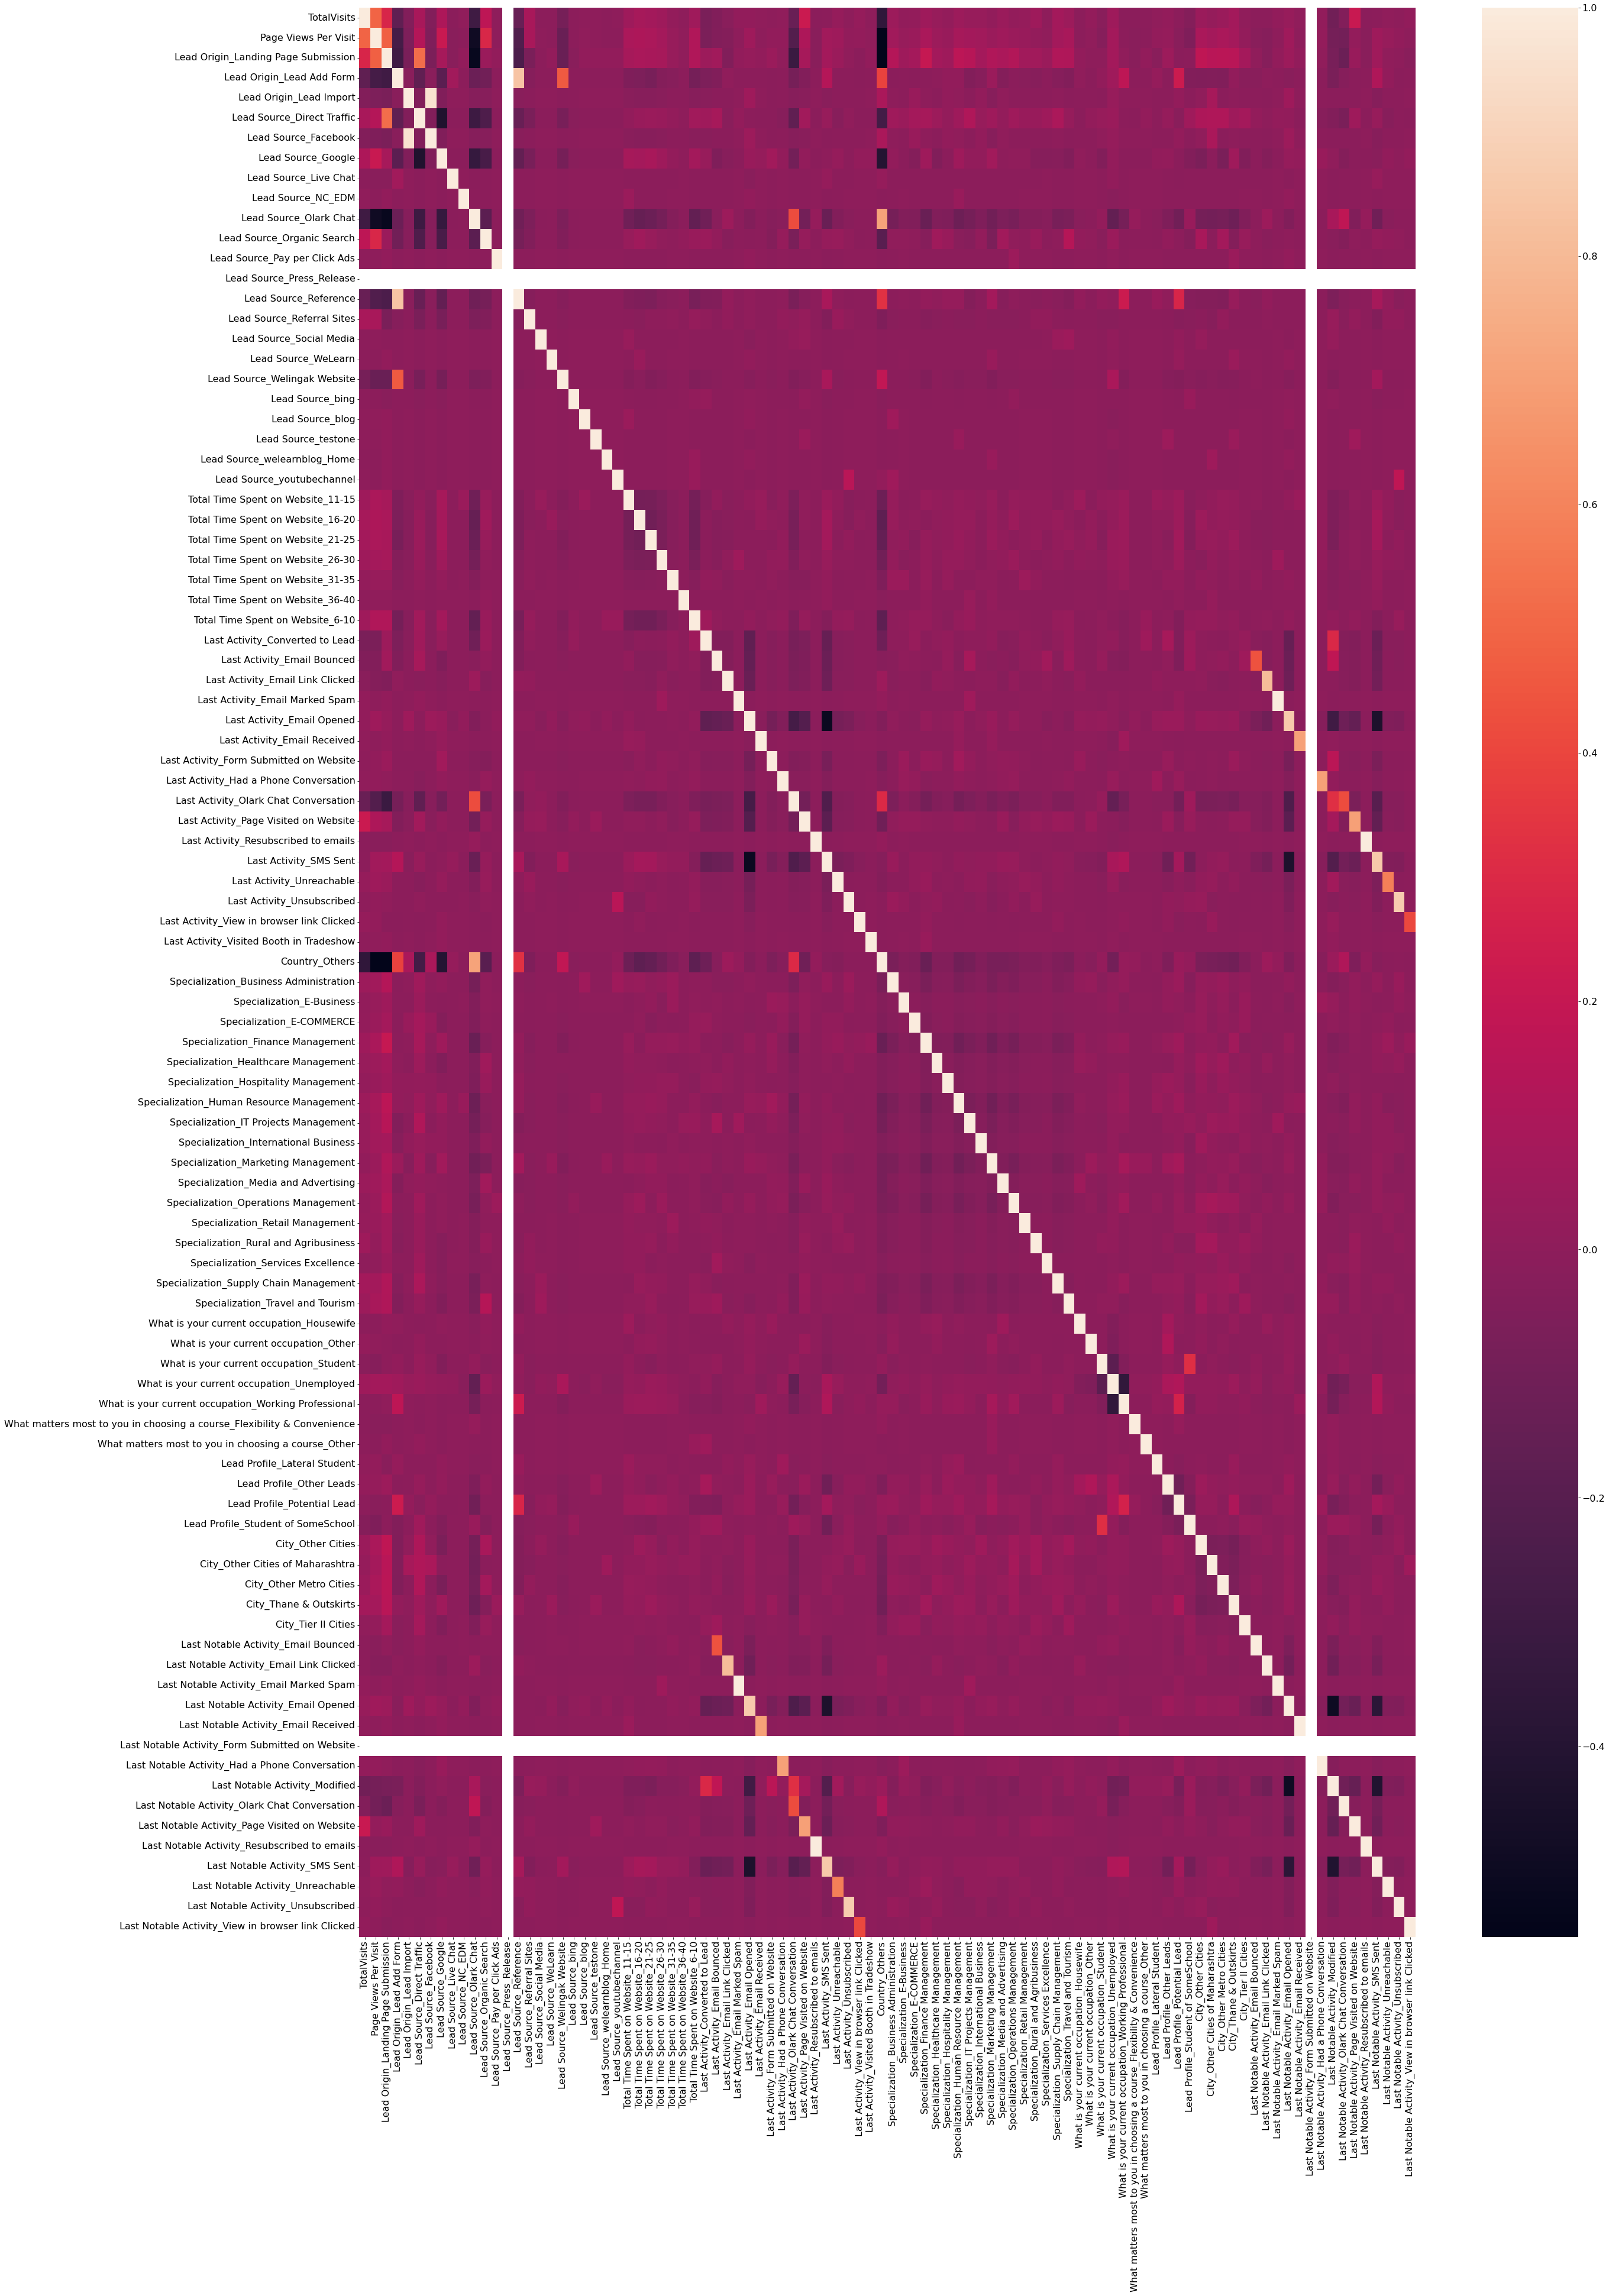

In [45]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,60))        # Size of the figure
sns.heatmap(X_train.corr())
plt.show()

In [46]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.5
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

# Drop columns with high correlation
X_train.drop(to_drop, axis=1, inplace=True)
X_test.drop(to_drop, axis=1, inplace=True)

### Model Building

In [47]:
logReg = LogisticRegression()

In [48]:
rfe = RFE(logReg, step = 15)
rfe = rfe.fit(X_train, y_train)

In [49]:
rfe.support_

array([ True,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True, False, False,
       False, False, False, False, False,  True, False,  True])

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 4),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Live Chat', False, 3),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 3),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 2),
 ('Lead Source_blog', True, 1),
 ('Lead Source_testone', False, 3),
 ('Lead Source_welearnblog_Home', False, 3),
 ('Lead Source_youtubechannel', False, 4),
 ('Total Time Spent on Website_11-15', True, 1),
 ('Total Time Spent on Website_16-20', True, 1),
 ('Total Time Spent on Website_21-25', True, 1),
 ('Total Time Spent on Website_26-30', True, 1),
 ('Total Time Spent

In [51]:
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [52]:
X_train.head()

,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_NC_EDM,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Source_blog,Total Time Spent on Website_11-15,Total Time Spent on Website_16-20,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,Lead Profile_Lateral Student,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified,Last Notable Activity_View in browser link Clicked
7962,0.011952,0.027273,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5520,0.027888,0.127273,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1962,0.019920,0.045455,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1566,0.055777,0.063636,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
9170,0.000000,0.000000,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


### Model Building Using Statsmodel

#### create a function to calculate vif

In [53]:
def calculate_vifs():
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

#### Create a function to create model

In [54]:
#Function to build a model
def build_model_using():
    X_train_sm = sm.add_constant(X_train)
    log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    return log_model

#### Model 1

In [55]:
model1 = build_model_using()
res = model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2391.2
Date:                Tue, 19 Mar 2024   Deviance:                       4782.4
Time:                        20:39:54   Pearson chi2:                 6.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4385
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.9582      0.113     -8.488      0.000      -1.180      -0.737
TotalVisits                                                                 7.6284      2.573      2.965      0.003       2.586      12.670
Page Views Per Visit                                                       -6.1120      1.316     -4.645      0.000      -8.691      -3.533
Lead Origin_Landing Page Submission                                        -0.6250      0.090     -6.972      0.000      -0.801      -0.449
Lead Origin_Lead Add Form                                                   2.2497      0.231      9.745      0.000       1.797       2.702
Lead Source_NC_EDM                                                         24.1111   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Referral Sites                                                 -0.3109      0.351     -0.887      0.375      -0.998       0.376
Lead Source_Welingak Website                                                2.3546      0.755      3.120      0.002       0.876       3.834
Lead Source_blog                                                          -22.6798   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website_11-15                                           2.1431      0.139     15.433      0.000       1.871       2.415
Total Time Spent on Website_16-20                                           2.4285      0.122     19.883      0.000       2.189       2.668
Total Time Spent on Website_21-25                                           2.3451      0.122     19.207      0.000       2.106       2.584
Total Time Spent on Website_26-30                                           2.3384      0.168     13.947      0.000       2.010       2.667
Total Time Spent on Website_31-35                                           2.5434      0.437      5.814      0.000       1.686       3.401
Total Time Spent on Website_6-10                                            0.4157      0.126      3.311      0.001       0.170       0.662
Last Activity_Converted to Lead                                            -1.9531      0.232     -8.406      0.000      -2.408      -1.498
Last Activity_Email Bounced                                                -2.8198      0.337     -8.368      0.000      -3.480      -2.159
Last Activity_Email Link Clicked                                           -1.4993      0.232     -6.468      0.000      -1.954      -1.045
Last Activity_Email Opened                                                 -1.1232      0.084    -13.342      0.000      -1.288      -0.958
Las

In [56]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.14
32,What is your current occupation_Unemployed,2.75
38,Last Notable Activity_Modified,2.26
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.70
17,Last Activity_Email Opened,1.69
36,Lead Profile_Potential Lead,1.49
20,Last Activity_Olark Chat Conversation,1.49
33,What is your current occupation_Working Profes...,1.42


#### Model 2

In [57]:
# Dropping Lead Source_NC_EDM	
X_train = X_train.drop(['Lead Source_NC_EDM'], axis = 1)

In [58]:
model2 = build_model_using()
res = model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2392.2
Date:                Tue, 19 Mar 2024   Deviance:                       4784.4
Time:                        20:40:02   Pearson chi2:                 6.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4384
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.9558      0.113     -8.470      0.000      -1.177      -0.735
TotalVisits                                                                 7.6908      2.575      2.987      0.003       2.644      12.738
Page Views Per Visit                                                       -6.1551      1.316     -4.678      0.000      -8.734      -3.576
Lead Origin_Landing Page Submission                                        -0.6226      0.090     -6.947      0.000      -0.798      -0.447
Lead Origin_Lead Add Form                                                   2.2508      0.231      9.749      0.000       1.798       2.703
Lead Source_Referral Sites                                                 -0.3112      0.351     -0.888      0.375      -0.998       0.376
Lead Source_Welingak Website                                                2.3546      0.755      3.120      0.002       0.876       3.834
Lead Source_blog                                                          -22.6941   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Total Time Spent on Website_11-15                                           2.1527      0.139     15.513      0.000       1.881       2.425
Total Time Spent on Website_16-20                                           2.4281      0.122     19.882      0.000       2.189       2.667
Total Time Spent on Website_21-25                                           2.3448      0.122     19.209      0.000       2.106       2.584
Total Time Spent on Website_26-30                                           2.3384      0.168     13.949      0.000       2.010       2.667
Total Time Spent on Website_31-35                                           2.5432      0.437      5.814      0.000       1.686       3.400
Total Time Spent on Website_6-10                                            0.4157      0.126      3.311      0.001       0.170       0.662
Last Activity_Converted to Lead                                            -1.9521      0.232     -8.402      0.000      -2.408      -1.497
Last Activity_Email Bounced                                                -2.8209      0.337     -8.371      0.000      -3.481      -2.160
Last Activity_Email Link Clicked                                           -1.4990      0.232     -6.467      0.000      -1.953      -1.045
Last Activity_Email Opened                                                 -1.1212      0.084    -13.322      0.000      -1.286      -0.956
Last Activity_Form Submitted on Website                                    -1.1030      0.339     -3.255      0.001      -1.767      -0.439
Las

In [59]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.14
31,What is your current occupation_Unemployed,2.75
37,Last Notable Activity_Modified,2.26
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.70
16,Last Activity_Email Opened,1.69
35,Lead Profile_Potential Lead,1.49
19,Last Activity_Olark Chat Conversation,1.49
32,What is your current occupation_Working Profes...,1.42


#### Model 3

In [60]:
# Dropping Lead Source_blog
X_train = X_train.drop(['Lead Source_blog'], axis = 1)

In [61]:
model3 = build_model_using()
res = model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2392.6
Date:                Tue, 19 Mar 2024   Deviance:                       4785.1
Time:                        20:40:10   Pearson chi2:                 6.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4383
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.9566      0.113     -8.476      0.000      -1.178      -0.735
TotalVisits                                                                 7.7035      2.576      2.991      0.003       2.655      12.752
Page Views Per Visit                                                       -6.1613      1.316     -4.682      0.000      -8.740      -3.582
Lead Origin_Landing Page Submission                                        -0.6234      0.090     -6.956      0.000      -0.799      -0.448
Lead Origin_Lead Add Form                                                   2.2499      0.231      9.746      0.000       1.797       2.702
Lead Source_Referral Sites                                                 -0.3113      0.351     -0.888      0.375      -0.998       0.376
Lead Source_Welingak Website                                                2.3546      0.755      3.120      0.002       0.876       3.834
Total Time Spent on Website_11-15                                           2.1485      0.139     15.505      0.000       1.877       2.420
Total Time Spent on Website_16-20                                           2.4285      0.122     19.883      0.000       2.189       2.668
Total Time Spent on Website_21-25                                           2.3451      0.122     19.209      0.000       2.106       2.584
Total Time Spent on Website_26-30                                           2.3386      0.168     13.949      0.000       2.010       2.667
Total Time Spent on Website_31-35                                           2.5435      0.437      5.815      0.000       1.686       3.401
Total Time Spent on Website_6-10                                            0.4159      0.126      3.313      0.001       0.170       0.662
Last Activity_Converted to Lead                                            -1.9529      0.232     -8.405      0.000      -2.408      -1.498
Last Activity_Email Bounced                                                -2.8207      0.337     -8.370      0.000      -3.481      -2.160
Last Activity_Email Link Clicked                                           -1.4993      0.232     -6.468      0.000      -1.954      -1.045
Last Activity_Email Opened                                                 -1.1222      0.084    -13.335      0.000      -1.287      -0.957
Last Activity_Form Submitted on Website                                    -1.1038      0.339     -3.257      0.001      -1.768      -0.440
Last Activity_Had a Phone Conversation                                      0.4706      0.659      0.715      0.475      -0.820       1.761
Las

In [62]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.14
30,What is your current occupation_Unemployed,2.75
36,Last Notable Activity_Modified,2.26
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.70
15,Last Activity_Email Opened,1.69
34,Lead Profile_Potential Lead,1.49
18,Last Activity_Olark Chat Conversation,1.49
31,What is your current occupation_Working Profes...,1.42


#### Model 4

In [63]:
# Drop Last Activity_Resubscribed to emails
X_train = X_train.drop(['Last Activity_Resubscribed to emails'], axis = 1)

In [64]:
model4 = build_model_using()
res = model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2393.8
Date:                Tue, 19 Mar 2024   Deviance:                       4787.7
Time:                        20:40:18   Pearson chi2:                 6.22e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4381
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                      -0.9474      0.113     -8.411      0.000      -1.168      -0.727
TotalVisits                                                                 7.6967      2.575      2.989      0.003       2.649      12.744
Page Views Per Visit                                                       -6.1821      1.316     -4.698      0.000      -8.761      -3.603
Lead Origin_Landing Page Submission                                        -0.6249      0.090     -6.974      0.000      -0.801      -0.449
Lead Origin_Lead Add Form                                                   2.2474      0.231      9.734      0.000       1.795       2.700
Lead Source_Referral Sites                                                 -0.3118      0.351     -0.890      0.374      -0.999       0.375
Lead Source_Welingak Website                                                2.3547      0.755      3.120      0.002       0.876       3.834
Total Time Spent on Website_11-15                                           2.1474      0.139     15.497      0.000       1.876       2.419
Total Time Spent on Website_16-20                                           2.4271      0.122     19.874      0.000       2.188       2.666
Total Time Spent on Website_21-25                                           2.3440      0.122     19.201      0.000       2.105       2.583
Total Time Spent on Website_26-30                                           2.3380      0.168     13.944      0.000       2.009       2.667
Total Time Spent on Website_31-35                                           2.5430      0.437      5.814      0.000       1.686       3.400
Total Time Spent on Website_6-10                                            0.4147      0.126      3.303      0.001       0.169       0.661
Last Activity_Converted to Lead                                            -1.9545      0.232     -8.413      0.000      -2.410      -1.499
Last Activity_Email Bounced                                                -2.8228      0.337     -8.377      0.000      -3.483      -2.162
Last Activity_Email Link Clicked                                           -1.5023      0.232     -6.483      0.000      -1.957      -1.048
Last Activity_Email Opened                                                 -1.1251      0.084    -13.373      0.000      -1.290      -0.960
Last Activity_Form Submitted on Website                                    -1.1051      0.339     -3.261      0.001      -1.769      -0.441
Last Activity_Had a Phone Conversation                                      0.4697      0.658      0.713      0.476      -0.821       1.760
Las

In [65]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.14
29,What is your current occupation_Unemployed,2.75
35,Last Notable Activity_Modified,2.26
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.70
15,Last Activity_Email Opened,1.69
33,Lead Profile_Potential Lead,1.49
18,Last Activity_Olark Chat Conversation,1.49
30,What is your current occupation_Working Profes...,1.42


#### Model 5

In [66]:
# Dropping What matters most to you in choosing a course_Flexibility & Convenience
X_train = X_train.drop(['What matters most to you in choosing a course_Flexibility & Convenience'], axis = 1)

In [67]:
model5 = build_model_using()
res = model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2394.6
Date:                Tue, 19 Mar 2024   Deviance:                       4789.2
Time:                        20:40:25   Pearson chi2:                 6.23e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4379
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9470      0.113     -8.408      0.000      -1.168      -0.726
TotalVisits                                              7.7003      2.575      2.991      0.003       2.654      12.747
Page Views Per Visit                                    -6.2004      1.316     -4.712      0.000      -8.780      -3.621
Lead Origin_Landing Page Submission                     -0.6270      0.090     -6.999      0.000      -0.803      -0.451
Lead Origin_Lead Add Form                                2.2426      0.231      9.716      0.000       1.790       2.695
Lead Source_Referral Sites                              -0.3124      0.351     -0.891      0.373      -0.999       0.375
Lead Source_Welingak Website                             2.3573      0.755      3.123      0.002       0.878       3.836
Total Time Spent on Website_11-15                        2.1466      0.139     15.489      0.000       1.875       2.418
Total Time Spent on Website_16-20                        2.4265      0.122     19.867      0.000       2.187       2.666
Total Time Spent on Website_21-25                        2.3429      0.122     19.192      0.000       2.104       2.582
Total Time Spent on Website_26-30                        2.3373      0.168     13.939      0.000       2.009       2.666
Total Time Spent on Website_31-35                        2.5432      0.438      5.812      0.000       1.686       3.401
Total Time Spent on Website_6-10                         0.4138      0.126      3.296      0.001       0.168       0.660
Last Activity_Converted to Lead                         -1.9585      0.232     -8.431      0.000      -2.414      -1.503
Last Activity_Email Bounced                             -2.8252      0.337     -8.383      0.000      -3.486      -2.165
Last Activity_Email Link Clicked                        -1.5036      0.232     -6.489      0.000      -1.958      -1.049
Last Activity_Email Opened                              -1.1238      0.084    -13.359      0.000      -1.289      -0.959
Last Activity_Form Submitted on Website                 -1.1083      0.339     -3.271      0.001      -1.772      -0.444
Last Activity_Had a Phone Conversation                   0.4671      0.658      0.710      0.478      -0.823       1.757
Last Activity_Olark Chat Conversation                   -2.1051      0.183    -11.503      0.000      -2.464      -1.746
Last Activity_Page Visited on Website                   -1.5914      0.168     -9.483      0.000      -1.920      -1.263
Last Activity_Unreachable                               -0.6520      0.322     -2.025      0.043      -1.283      -0.021
Last Activity_Unsubscribed                              -1

In [68]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.13
29,What is your current occupation_Unemployed,2.75
34,Last Notable Activity_Modified,2.26
0,TotalVisits,2.06
15,Last Activity_Email Opened,1.69
3,Lead Origin_Lead Add Form,1.69
32,Lead Profile_Potential Lead,1.49
18,Last Activity_Olark Chat Conversation,1.49
30,What is your current occupation_Working Profes...,1.42


#### Model 6

In [69]:
# Dropping Last Notable Activity_View in browser link Clicked
X_train = X_train.drop(['Last Notable Activity_View in browser link Clicked'], axis = 1)

In [70]:
model6 = build_model_using()
res = model6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2394.8
Date:                Tue, 19 Mar 2024   Deviance:                       4789.6
Time:                        20:40:32   Pearson chi2:                 6.23e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4379
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9477      0.113     -8.414      0.000      -1.168      -0.727
TotalVisits                                              7.7040      2.575      2.991      0.003       2.656      12.752
Page Views Per Visit                                    -6.2041      1.316     -4.714      0.000      -8.784      -3.625
Lead Origin_Landing Page Submission                     -0.6263      0.090     -6.991      0.000      -0.802      -0.451
Lead Origin_Lead Add Form                                2.2429      0.231      9.717      0.000       1.790       2.695
Lead Source_Referral Sites                              -0.3123      0.351     -0.891      0.373      -0.999       0.375
Lead Source_Welingak Website                             2.3574      0.755      3.124      0.002       0.878       3.837
Total Time Spent on Website_11-15                        2.1467      0.139     15.490      0.000       1.875       2.418
Total Time Spent on Website_16-20                        2.4271      0.122     19.872      0.000       2.188       2.666
Total Time Spent on Website_21-25                        2.3430      0.122     19.192      0.000       2.104       2.582
Total Time Spent on Website_26-30                        2.3373      0.168     13.939      0.000       2.009       2.666
Total Time Spent on Website_31-35                        2.5434      0.438      5.813      0.000       1.686       3.401
Total Time Spent on Website_6-10                         0.4139      0.126      3.297      0.001       0.168       0.660
Last Activity_Converted to Lead                         -1.9598      0.232     -8.436      0.000      -2.415      -1.504
Last Activity_Email Bounced                             -2.8260      0.337     -8.385      0.000      -3.487      -2.165
Last Activity_Email Link Clicked                        -1.5037      0.232     -6.489      0.000      -1.958      -1.049
Last Activity_Email Opened                              -1.1237      0.084    -13.359      0.000      -1.289      -0.959
Last Activity_Form Submitted on Website                 -1.1096      0.339     -3.275      0.001      -1.774      -0.445
Last Activity_Had a Phone Conversation                   0.4666      0.658      0.709      0.478      -0.824       1.757
Last Activity_Olark Chat Conversation                   -2.1055      0.183    -11.505      0.000      -2.464      -1.747
Last Activity_Page Visited on Website                   -1.5919      0.168     -9.486      0.000      -1.921      -1.263
Last Activity_Unreachable                               -0.6527      0.322     -2.027      0.043      -1.284      -0.021
Last Activity_Unsubscribed                              -1

In [71]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.13
29,What is your current occupation_Unemployed,2.75
34,Last Notable Activity_Modified,2.25
0,TotalVisits,2.06
15,Last Activity_Email Opened,1.69
3,Lead Origin_Lead Add Form,1.69
32,Lead Profile_Potential Lead,1.49
18,Last Activity_Olark Chat Conversation,1.49
30,What is your current occupation_Working Profes...,1.42


#### Model 7

In [72]:
# Dropping Lead Profile_Lateral Student
X_train = X_train.drop(['Lead Profile_Lateral Student'], axis = 1)

In [73]:
model7 = build_model_using()
res = model7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2402.6
Date:                Tue, 19 Mar 2024   Deviance:                       4805.3
Time:                        20:40:38   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4365
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9600      0.113     -8.531      0.000      -1.181      -0.739
TotalVisits                                              7.8596      2.575      3.052      0.002       2.812      12.907
Page Views Per Visit                                    -6.1511      1.308     -4.704      0.000      -8.714      -3.588
Lead Origin_Landing Page Submission                     -0.6313      0.089     -7.079      0.000      -0.806      -0.456
Lead Origin_Lead Add Form                                2.2892      0.232      9.884      0.000       1.835       2.743
Lead Source_Referral Sites                              -0.3255      0.351     -0.929      0.353      -1.012       0.362
Lead Source_Welingak Website                             2.3041      0.755      3.052      0.002       0.824       3.784
Total Time Spent on Website_11-15                        2.1599      0.138     15.628      0.000       1.889       2.431
Total Time Spent on Website_16-20                        2.4259      0.122     19.904      0.000       2.187       2.665
Total Time Spent on Website_21-25                        2.3433      0.122     19.228      0.000       2.104       2.582
Total Time Spent on Website_26-30                        2.3419      0.167     13.997      0.000       2.014       2.670
Total Time Spent on Website_31-35                        2.5354      0.438      5.795      0.000       1.678       3.393
Total Time Spent on Website_6-10                         0.4175      0.125      3.336      0.001       0.172       0.663
Last Activity_Converted to Lead                         -1.9698      0.232     -8.484      0.000      -2.425      -1.515
Last Activity_Email Bounced                             -2.8315      0.337     -8.409      0.000      -3.491      -2.171
Last Activity_Email Link Clicked                        -1.4766      0.230     -6.431      0.000      -1.927      -1.027
Last Activity_Email Opened                              -1.1124      0.084    -13.250      0.000      -1.277      -0.948
Last Activity_Form Submitted on Website                 -1.1212      0.339     -3.307      0.001      -1.786      -0.457
Last Activity_Had a Phone Conversation                   0.5071      0.646      0.784      0.433      -0.760       1.774
Last Activity_Olark Chat Conversation                   -2.1113      0.183    -11.539      0.000      -2.470      -1.753
Last Activity_Page Visited on Website                   -1.5986      0.168     -9.524      0.000      -1.928      -1.270
Last Activity_Unreachable                               -0.6607      0.322     -2.054      0.040      -1.291      -0.030
Last Activity_Unsubscribed                              -1

In [74]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.13
29,What is your current occupation_Unemployed,2.75
33,Last Notable Activity_Modified,2.25
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.69
15,Last Activity_Email Opened,1.69
18,Last Activity_Olark Chat Conversation,1.49
31,Lead Profile_Potential Lead,1.48
30,What is your current occupation_Working Profes...,1.42


#### Model 8

In [75]:
# Dropping Last Activity_Had a Phone Conversation
X_train = X_train.drop(['Last Activity_Had a Phone Conversation'], axis = 1)

In [76]:
model8 = build_model_using()
res = model8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2403.0
Date:                Tue, 19 Mar 2024   Deviance:                       4805.9
Time:                        20:40:45   Pearson chi2:                 6.25e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4365
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9587      0.113     -8.519      0.000      -1.179      -0.738
TotalVisits                                              7.8809      2.576      3.059      0.002       2.832      12.930
Page Views Per Visit                                    -6.1473      1.307     -4.702      0.000      -8.710      -3.585
Lead Origin_Landing Page Submission                     -0.6314      0.089     -7.081      0.000      -0.806      -0.457
Lead Origin_Lead Add Form                                2.2905      0.232      9.889      0.000       1.837       2.744
Lead Source_Referral Sites                              -0.3191      0.349     -0.914      0.361      -1.003       0.365
Lead Source_Welingak Website                             2.3016      0.755      3.048      0.002       0.822       3.781
Total Time Spent on Website_11-15                        2.1592      0.138     15.624      0.000       1.888       2.430
Total Time Spent on Website_16-20                        2.4254      0.122     19.902      0.000       2.187       2.664
Total Time Spent on Website_21-25                        2.3435      0.122     19.231      0.000       2.105       2.582
Total Time Spent on Website_26-30                        2.3427      0.167     14.007      0.000       2.015       2.671
Total Time Spent on Website_31-35                        2.5352      0.438      5.792      0.000       1.677       3.393
Total Time Spent on Website_6-10                         0.4218      0.125      3.376      0.001       0.177       0.667
Last Activity_Converted to Lead                         -1.9784      0.232     -8.531      0.000      -2.433      -1.524
Last Activity_Email Bounced                             -2.8376      0.337     -8.430      0.000      -3.497      -2.178
Last Activity_Email Link Clicked                        -1.4818      0.230     -6.456      0.000      -1.932      -1.032
Last Activity_Email Opened                              -1.1168      0.084    -13.332      0.000      -1.281      -0.953
Last Activity_Form Submitted on Website                 -1.1300      0.339     -3.334      0.001      -1.794      -0.466
Last Activity_Olark Chat Conversation                   -2.1180      0.183    -11.588      0.000      -2.476      -1.760
Last Activity_Page Visited on Website                   -1.6048      0.168     -9.571      0.000      -1.933      -1.276
Last Activity_Unreachable                               -0.6678      0.321     -2.077      0.038      -1.298      -0.038
Last Activity_Unsubscribed                              -1.3685      0.465     -2.940      0.003      -2.281      -0.456
Last Activity_View in browser link Clicked              -1

In [77]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.13
28,What is your current occupation_Unemployed,2.75
32,Last Notable Activity_Modified,2.25
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.69
15,Last Activity_Email Opened,1.68
17,Last Activity_Olark Chat Conversation,1.48
30,Lead Profile_Potential Lead,1.48
29,What is your current occupation_Working Profes...,1.42


#### Model 9

In [78]:
# Dropping What is your current occupation_Housewife
X_train = X_train.drop(['What is your current occupation_Housewife'], axis = 1)

In [79]:
model9 = build_model_using()
res = model9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2411.2
Date:                Tue, 19 Mar 2024   Deviance:                       4822.3
Time:                        20:40:50   Pearson chi2:                 6.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4350
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9414      0.112     -8.396      0.000      -1.161      -0.722
TotalVisits                                              7.7986      2.570      3.034      0.002       2.761      12.836
Page Views Per Visit                                    -6.1775      1.306     -4.731      0.000      -8.737      -3.618
Lead Origin_Landing Page Submission                     -0.6193      0.089     -6.959      0.000      -0.794      -0.445
Lead Origin_Lead Add Form                                2.3196      0.232     10.003      0.000       1.865       2.774
Lead Source_Referral Sites                              -0.3178      0.348     -0.912      0.362      -1.001       0.365
Lead Source_Welingak Website                             2.2798      0.755      3.019      0.003       0.800       3.760
Total Time Spent on Website_11-15                        2.1845      0.138     15.849      0.000       1.914       2.455
Total Time Spent on Website_16-20                        2.4182      0.122     19.879      0.000       2.180       2.657
Total Time Spent on Website_21-25                        2.3396      0.122     19.243      0.000       2.101       2.578
Total Time Spent on Website_26-30                        2.3527      0.167     14.093      0.000       2.026       2.680
Total Time Spent on Website_31-35                        2.5286      0.437      5.787      0.000       1.672       3.385
Total Time Spent on Website_6-10                         0.4176      0.125      3.347      0.001       0.173       0.662
Last Activity_Converted to Lead                         -1.9730      0.232     -8.515      0.000      -2.427      -1.519
Last Activity_Email Bounced                             -2.8376      0.336     -8.435      0.000      -3.497      -2.178
Last Activity_Email Link Clicked                        -1.4557      0.227     -6.404      0.000      -1.901      -1.010
Last Activity_Email Opened                              -1.1075      0.084    -13.240      0.000      -1.272      -0.944
Last Activity_Form Submitted on Website                 -1.0449      0.332     -3.147      0.002      -1.696      -0.394
Last Activity_Olark Chat Conversation                   -2.1138      0.183    -11.578      0.000      -2.472      -1.756
Last Activity_Page Visited on Website                   -1.6038      0.168     -9.571      0.000      -1.932      -1.275
Last Activity_Unreachable                               -0.6685      0.322     -2.078      0.038      -1.299      -0.038
Last Activity_Unsubscribed                              -1.3669      0.466     -2.936      0.003      -2.279      -0.455
Last Activity_View in browser link Clicked              -1

In [80]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.57
2,Lead Origin_Landing Page Submission,3.13
27,What is your current occupation_Unemployed,2.74
31,Last Notable Activity_Modified,2.25
0,TotalVisits,2.06
3,Lead Origin_Lead Add Form,1.69
15,Last Activity_Email Opened,1.68
29,Lead Profile_Potential Lead,1.48
17,Last Activity_Olark Chat Conversation,1.48
28,What is your current occupation_Working Profes...,1.42


#### Model 10

In [81]:
# Dropping Lead Source_Referral Sites
X_train = X_train.drop(['Lead Source_Referral Sites'], axis = 1)

In [82]:
model10 = build_model_using()
res = model10.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6340
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2411.6
Date:                Tue, 19 Mar 2024   Deviance:                       4823.2
Time:                        20:40:55   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4349
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9437      0.112     -8.421      0.000      -1.163      -0.724
TotalVisits                                              7.5126      2.547      2.949      0.003       2.520      12.505
Page Views Per Visit                                    -6.2244      1.304     -4.773      0.000      -8.780      -3.668
Lead Origin_Landing Page Submission                     -0.6090      0.088     -6.900      0.000      -0.782      -0.436
Lead Origin_Lead Add Form                                2.3226      0.232     10.016      0.000       1.868       2.777
Lead Source_Welingak Website                             2.2800      0.755      3.019      0.003       0.800       3.760
Total Time Spent on Website_11-15                        2.1857      0.138     15.867      0.000       1.916       2.456
Total Time Spent on Website_16-20                        2.4192      0.122     19.894      0.000       2.181       2.658
Total Time Spent on Website_21-25                        2.3397      0.122     19.251      0.000       2.102       2.578
Total Time Spent on Website_26-30                        2.3519      0.167     14.080      0.000       2.025       2.679
Total Time Spent on Website_31-35                        2.5252      0.438      5.772      0.000       1.668       3.383
Total Time Spent on Website_6-10                         0.4127      0.125      3.311      0.001       0.168       0.657
Last Activity_Converted to Lead                         -1.9745      0.232     -8.525      0.000      -2.428      -1.521
Last Activity_Email Bounced                             -2.8374      0.336     -8.433      0.000      -3.497      -2.178
Last Activity_Email Link Clicked                        -1.4588      0.227     -6.418      0.000      -1.904      -1.013
Last Activity_Email Opened                              -1.1081      0.084    -13.248      0.000      -1.272      -0.944
Last Activity_Form Submitted on Website                 -1.0450      0.332     -3.149      0.002      -1.695      -0.395
Last Activity_Olark Chat Conversation                   -2.1150      0.183    -11.580      0.000      -2.473      -1.757
Last Activity_Page Visited on Website                   -1.6046      0.168     -9.579      0.000      -1.933      -1.276
Last Activity_Unreachable                               -0.6801      0.321     -2.116      0.034      -1.310      -0.050
Last Activity_Unsubscribed                              -1.3802      0.467     -2.957      0.003      -2.295      -0.465
Last Activity_View in browser link Clicked              -1.6477      1.179     -1.398      0.162      -3.958       0.663
Specialization_E-Business                                0

In [83]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.53
2,Lead Origin_Landing Page Submission,3.08
26,What is your current occupation_Unemployed,2.74
30,Last Notable Activity_Modified,2.24
0,TotalVisits,2.05
3,Lead Origin_Lead Add Form,1.69
14,Last Activity_Email Opened,1.67
28,Lead Profile_Potential Lead,1.48
16,Last Activity_Olark Chat Conversation,1.48
27,What is your current occupation_Working Profes...,1.42


#### Model 11

In [84]:
# Dropping Last Activity_View in browser link Clicked
X_train = X_train.drop(['Last Activity_View in browser link Clicked'], axis = 1)

In [85]:
model11 = build_model_using()
res = model11.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2412.8
Date:                Tue, 19 Mar 2024   Deviance:                       4825.6
Time:                        20:40:59   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4347
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9464      0.112     -8.448      0.000      -1.166      -0.727
TotalVisits                                              7.3275      2.532      2.894      0.004       2.365      12.290
Page Views Per Visit                                    -6.2069      1.302     -4.769      0.000      -8.758      -3.656
Lead Origin_Landing Page Submission                     -0.6069      0.088     -6.881      0.000      -0.780      -0.434
Lead Origin_Lead Add Form                                2.3263      0.232     10.033      0.000       1.872       2.781
Lead Source_Welingak Website                             2.2803      0.755      3.020      0.003       0.800       3.760
Total Time Spent on Website_11-15                        2.1890      0.138     15.895      0.000       1.919       2.459
Total Time Spent on Website_16-20                        2.4186      0.122     19.898      0.000       2.180       2.657
Total Time Spent on Website_21-25                        2.3431      0.121     19.286      0.000       2.105       2.581
Total Time Spent on Website_26-30                        2.3550      0.167     14.102      0.000       2.028       2.682
Total Time Spent on Website_31-35                        2.5272      0.437      5.779      0.000       1.670       3.384
Total Time Spent on Website_6-10                         0.4166      0.125      3.343      0.001       0.172       0.661
Last Activity_Converted to Lead                         -1.9619      0.231     -8.479      0.000      -2.415      -1.508
Last Activity_Email Bounced                             -2.8281      0.336     -8.408      0.000      -3.487      -2.169
Last Activity_Email Link Clicked                        -1.4522      0.227     -6.390      0.000      -1.898      -1.007
Last Activity_Email Opened                              -1.1027      0.084    -13.198      0.000      -1.267      -0.939
Last Activity_Form Submitted on Website                 -1.0317      0.332     -3.111      0.002      -1.682      -0.382
Last Activity_Olark Chat Conversation                   -2.1038      0.182    -11.530      0.000      -2.461      -1.746
Last Activity_Page Visited on Website                   -1.5939      0.167     -9.527      0.000      -1.922      -1.266
Last Activity_Unreachable                               -0.6703      0.322     -2.085      0.037      -1.300      -0.040
Last Activity_Unsubscribed                              -1.3753      0.467     -2.946      0.003      -2.290      -0.460
Specialization_E-Business                                0.9694      0.424      2.284      0.022       0.138       1.801
Specialization_Hospitality Management                   -0

In [86]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.53
2,Lead Origin_Landing Page Submission,3.07
25,What is your current occupation_Unemployed,2.73
29,Last Notable Activity_Modified,2.24
0,TotalVisits,2.05
3,Lead Origin_Lead Add Form,1.69
14,Last Activity_Email Opened,1.67
27,Lead Profile_Potential Lead,1.48
16,Last Activity_Olark Chat Conversation,1.48
26,What is your current occupation_Working Profes...,1.42


#### Model 12

In [87]:
# Dropping Specialization_Hospitality Management
X_train = X_train.drop(['Specialization_Hospitality Management'], axis = 1)

In [88]:
model12 = build_model_using()
res = model12.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2414.1
Date:                Tue, 19 Mar 2024   Deviance:                       4828.2
Time:                        20:41:03   Pearson chi2:                 6.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4345
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9446      0.112     -8.436      0.000      -1.164      -0.725
TotalVisits                                              7.2949      2.525      2.889      0.004       2.346      12.244
Page Views Per Visit                                    -6.2082      1.301     -4.773      0.000      -8.758      -3.659
Lead Origin_Landing Page Submission                     -0.6128      0.088     -6.953      0.000      -0.786      -0.440
Lead Origin_Lead Add Form                                2.3018      0.231      9.979      0.000       1.850       2.754
Lead Source_Welingak Website                             2.3067      0.755      3.057      0.002       0.828       3.786
Total Time Spent on Website_11-15                        2.1873      0.138     15.896      0.000       1.918       2.457
Total Time Spent on Website_16-20                        2.4143      0.121     19.881      0.000       2.176       2.652
Total Time Spent on Website_21-25                        2.3408      0.121     19.267      0.000       2.103       2.579
Total Time Spent on Website_26-30                        2.3459      0.167     14.062      0.000       2.019       2.673
Total Time Spent on Website_31-35                        2.4930      0.437      5.705      0.000       1.637       3.349
Total Time Spent on Website_6-10                         0.4175      0.125      3.351      0.001       0.173       0.662
Last Activity_Converted to Lead                         -1.9628      0.231     -8.490      0.000      -2.416      -1.510
Last Activity_Email Bounced                             -2.8316      0.336     -8.433      0.000      -3.490      -2.174
Last Activity_Email Link Clicked                        -1.4587      0.227     -6.413      0.000      -1.905      -1.013
Last Activity_Email Opened                              -1.1041      0.084    -13.218      0.000      -1.268      -0.940
Last Activity_Form Submitted on Website                 -1.0213      0.331     -3.084      0.002      -1.670      -0.372
Last Activity_Olark Chat Conversation                   -2.1033      0.182    -11.526      0.000      -2.461      -1.746
Last Activity_Page Visited on Website                   -1.5906      0.167     -9.512      0.000      -1.918      -1.263
Last Activity_Unreachable                               -0.6670      0.321     -2.078      0.038      -1.296      -0.038
Last Activity_Unsubscribed                              -1.3702      0.467     -2.937      0.003      -2.285      -0.456
Specialization_E-Business                                0.9780      0.424      2.306      0.021       0.147       1.809
Specialization_Marketing Management                      0

In [89]:
calculate_vifs()

,Features,VIF
1,Page Views Per Visit,3.53
2,Lead Origin_Landing Page Submission,3.07
24,What is your current occupation_Unemployed,2.73
28,Last Notable Activity_Modified,2.23
0,TotalVisits,2.05
3,Lead Origin_Lead Add Form,1.69
14,Last Activity_Email Opened,1.67
26,Lead Profile_Potential Lead,1.48
16,Last Activity_Olark Chat Conversation,1.48
25,What is your current occupation_Working Profes...,1.42


### Model Evaluation

#### Predicting the probabilities of the y train values

In [90]:
# Predicting the y training values
y_train_pred = res.predict(sm.add_constant(X_train)).values.reshape(-1)
y_train_pred[:10]

array([0.82857757, 0.085186  , 0.18341877, 0.98842628, 0.5654394 ,
       0.11417998, 0.75735004, 0.16158774, 0.27996512, 0.86956071])

In [91]:
# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.828578
1,0,0.085186
2,0,0.183419
3,1,0.988426
4,0,0.565439


In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0,0.828578,1
1,0,0.085186,0
2,0,0.183419,0
3,1,0.988426,1
4,0,0.565439,1


In [93]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8198367859384809


#### Creating the confusion matrix

In [94]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3499  454]
 [ 694 1725]]


### Metrics beyond simply accuracy

In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7131045886730054

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.8851505185934733

In [98]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11484948140652669


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.791647544745296


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8344860481755306


### Plotting the ROC curve

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

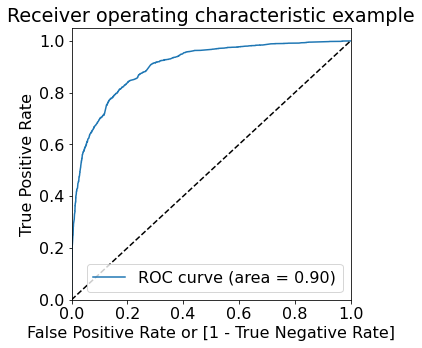

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding optimal Cutoff

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.828578,1,1,1,1,1,1,1,1,1,1,0
1,0,0.085186,0,1,0,0,0,0,0,0,0,0,0
2,0,0.183419,0,1,1,0,0,0,0,0,0,0,0
3,1,0.988426,1,1,1,1,1,1,1,1,1,1,1
4,0,0.565439,1,1,1,1,1,1,1,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.661331  0.971062  0.471794
0.2   0.2  0.773854  0.921042  0.683784
0.3   0.3  0.811833  0.847044  0.790286
0.4   0.4  0.825643  0.787102  0.849228
0.5   0.5  0.819837  0.713105  0.885151
0.6   0.6  0.822191  0.658123  0.922590
0.7   0.7  0.814030  0.588673  0.951935
0.8   0.8  0.785625  0.482844  0.970908
0.9   0.9  0.734306  0.316660  0.989881


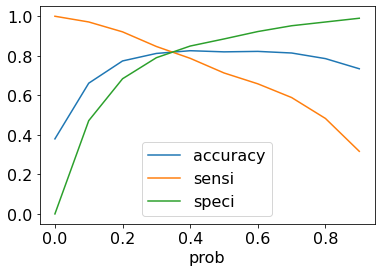

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.828578,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.085186,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.183419,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.988426,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.565439,1,1,1,1,1,1,1,0,0,0,0,1


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8198367859384809

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3246,  707],
       [ 441, 1978]])

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8176932616783795

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8211484948140653

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.17885150518593473


In [114]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7366852886405959


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8803905614320586


### Precision and Recall

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3499,  454],
       [ 694, 1725]])

#### Precision

In [117]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.791647544745296

#### Recall

In [118]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7131045886730054

Using sklearn utilities for the same

In [119]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.791647544745296

In [120]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7131045886730054

#### Precession and Recall tradeoff

In [121]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

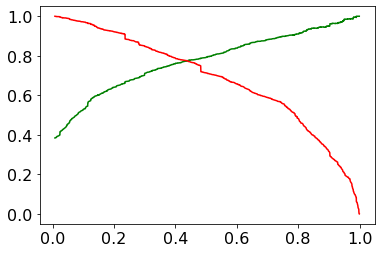

In [122]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The trade-off between precision and recall occurs because improving one usually comes at the expense of the other. The choice of the threshold impacts the balance between precision and recall. By adjusting the threshold, we can make the model more conservative (increasing precision but potentially reducing recall) or more liberal (increasing recall but potentially reducing precision).

The threshold here selected is 0.41.

In [123]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.828578,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.085186,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.183419,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.988426,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.565439,1,1,1,1,1,1,1,0,0,0,0,1


In [124]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8256434400502197

### Making Predictions on the test set

In [125]:
X_test[['TotalVisits', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit']])

In [126]:
X_test = X_test[X_train.columns]
X_test.head()

,TotalVisits,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Total Time Spent on Website_11-15,Total Time Spent on Website_16-20,Total Time Spent on Website_21-25,Total Time Spent on Website_26-30,Total Time Spent on Website_31-35,...,Last Activity_Unsubscribed,Specialization_E-Business,Specialization_Marketing Management,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Last Notable Activity_Modified
3504,0.011952,0.054545,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4050,0.000000,0.000000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7201,0.007968,0.036364,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1196,0.015936,0.072727,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8219,0.027888,0.031818,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [127]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [128]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.165052
4050    0.975137
7201    0.791927
1196    0.153823
8219    0.093828
8747    0.114180
9048    0.490478
6524    0.093825
7693    0.299282
8187    0.903048
dtype: float64

In [129]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.165052
1,1,0.975137
2,0,0.791927
3,0,0.153823
4,1,0.093828


In [130]:
# Making predictions on the test set using 0.41 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.165052,0
1,1,0.975137,1
2,0,0.791927,1
3,0,0.153823,0
4,1,0.093828,0


In [131]:
# Let's checking the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8308311973636031

In [132]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1433,  256],
       [ 206,  836]])

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Calculating the Precision

TP/(TP+FP)

0.7655677655677655

In [135]:
# Calculating Recall

TP/(TP+FN)

0.8023032629558541

### Observations and conclusions.

The following are the observations that contribute to increase in probability of lead conversion.
1. Total time spent on website greater than 15 minutes, there are more chances for
lead to convert.
2. Working Professionals are more likely to convert.
3. Leads notified by SMS are more likely to convert.
4. Lead Profile with potential lead.

Similarly Top categorical variables in the model which should be focused the most are:
1. Lead Source with element Welingak Website.
2. What is your current occupation.
3. Lead Origin with element Lead Add Form.